In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
'''
Add plt config
@Author: MinHyung Lee
@Since: 2022/05/24

'''

plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
rcParams['figure.dpi'] = 600

pd.set_option('display.max_rows', 20)

df = pd.read_csv('Google-Playstore.csv')

df.head()

App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True    0.0  ...   
2              50.0                58  True    0.0  ...   
3              10.0                19  True    0.0  ...   
4             100.0               478  True    0.0  ...   

                  Developer Website              Developer Email  \
0       https://beniyizibyose.tk/#/       jean21101999@gmail.com   
1   https://webserveis.netlify.app/         webserveis@gmail.com   
2                               NaN          vnacrewit@gmail.com   
3  http://www.climatesmarttech.com/  climatesmarttech2@gmail.com   
4       http://www.horodyski.com.pl    rmilekhorodyski@gmail.com   

       Released  Last Updated Content Rating  \
0  Feb 26, 2020  Feb 26, 2020       Everyone   
1  May 21, 2020  May 06, 2021       Everyone   
2   Aug 9, 2019  Aug 19, 2019       Everyone   
3  Sep 10, 2018  Oct 13, 2018       Everyone   
4  Feb 21, 2020  Nov 12, 2018       Everyone   

                                      Privacy Policy Ad Supported  \
0                 https://beniyizibyose.tk/projects/        False   
1  https://dev4phones.wordpress.com/licencia-de-uso/         True   
2  https://www.vietnamairlines.com/vn/en/terms-an...        False   
3                                                NaN         True   
4                        http://www.horodyski.com.pl        False   

  In App Purchases Editors Choice         Scraped Time  
0            False          False  2021-06-15 20:19:35  
1            False          False  2021-06-15 20:19:35  
2            False          False  2021-06-15 20:19:35  
3            False          False  2021-06-15 20:19:35  
4            False          False  2021-06-15 20:19:35  

[5 rows x 24 columns]

## RAW data EDA
- 각각의 cell에 대해
- 왜 이런 시각화를 사용하였는지
- 분포는 어떠한지
- 왜 이러한 Feature 들을 이용해서 그래프를 plot 하였는지 언급하기 바람

In [36]:
df.describe()

Rating  Rating Count  Minimum Installs  Maximum Installs  \
count  19811.000000  1.981100e+04      1.999800e+04      2.000000e+04   
mean       2.219439  2.215719e+03      1.495856e+05      3.461904e+05   
std        2.109778  5.931335e+04      7.252189e+06      2.138906e+07   
min        0.000000  0.000000e+00      0.000000e+00      0.000000e+00   
25%        0.000000  0.000000e+00      5.000000e+01      8.675000e+01   
50%        3.000000  6.000000e+00      5.000000e+02      7.080000e+02   
75%        4.300000  4.200000e+01      5.000000e+03      7.494000e+03   
max        5.000000  6.527424e+06      1.000000e+09      2.961820e+09   

              Price  
count  20000.000000  
mean       0.090312  
std        1.449355  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      119.990000

In [6]:
category_dist = df.groupby(['Category'])[['Rating', 'Maximum Installs']].agg('sum')\
                    .sort_values(by=['Rating', 'Maximum Installs'], ascending=[False, False])


In [4]:
(df.groupby(['Category']).agg('sum')['Rating']
                    .transform(lambda x: x/x.sum())*100)\
                    .to_frame().sort_values(by='Rating', ascending=False)


Rating
Category                    
Education          10.678358
Music & Audio       6.823017
Entertainment       6.640844
Tools               6.601673
Books & Reference   5.696467
...                      ...
Dating              0.313368
Music               0.218591
Libraries & Demo    0.209648
Parenting           0.180784
Comics              0.160185

[48 rows x 1 columns]

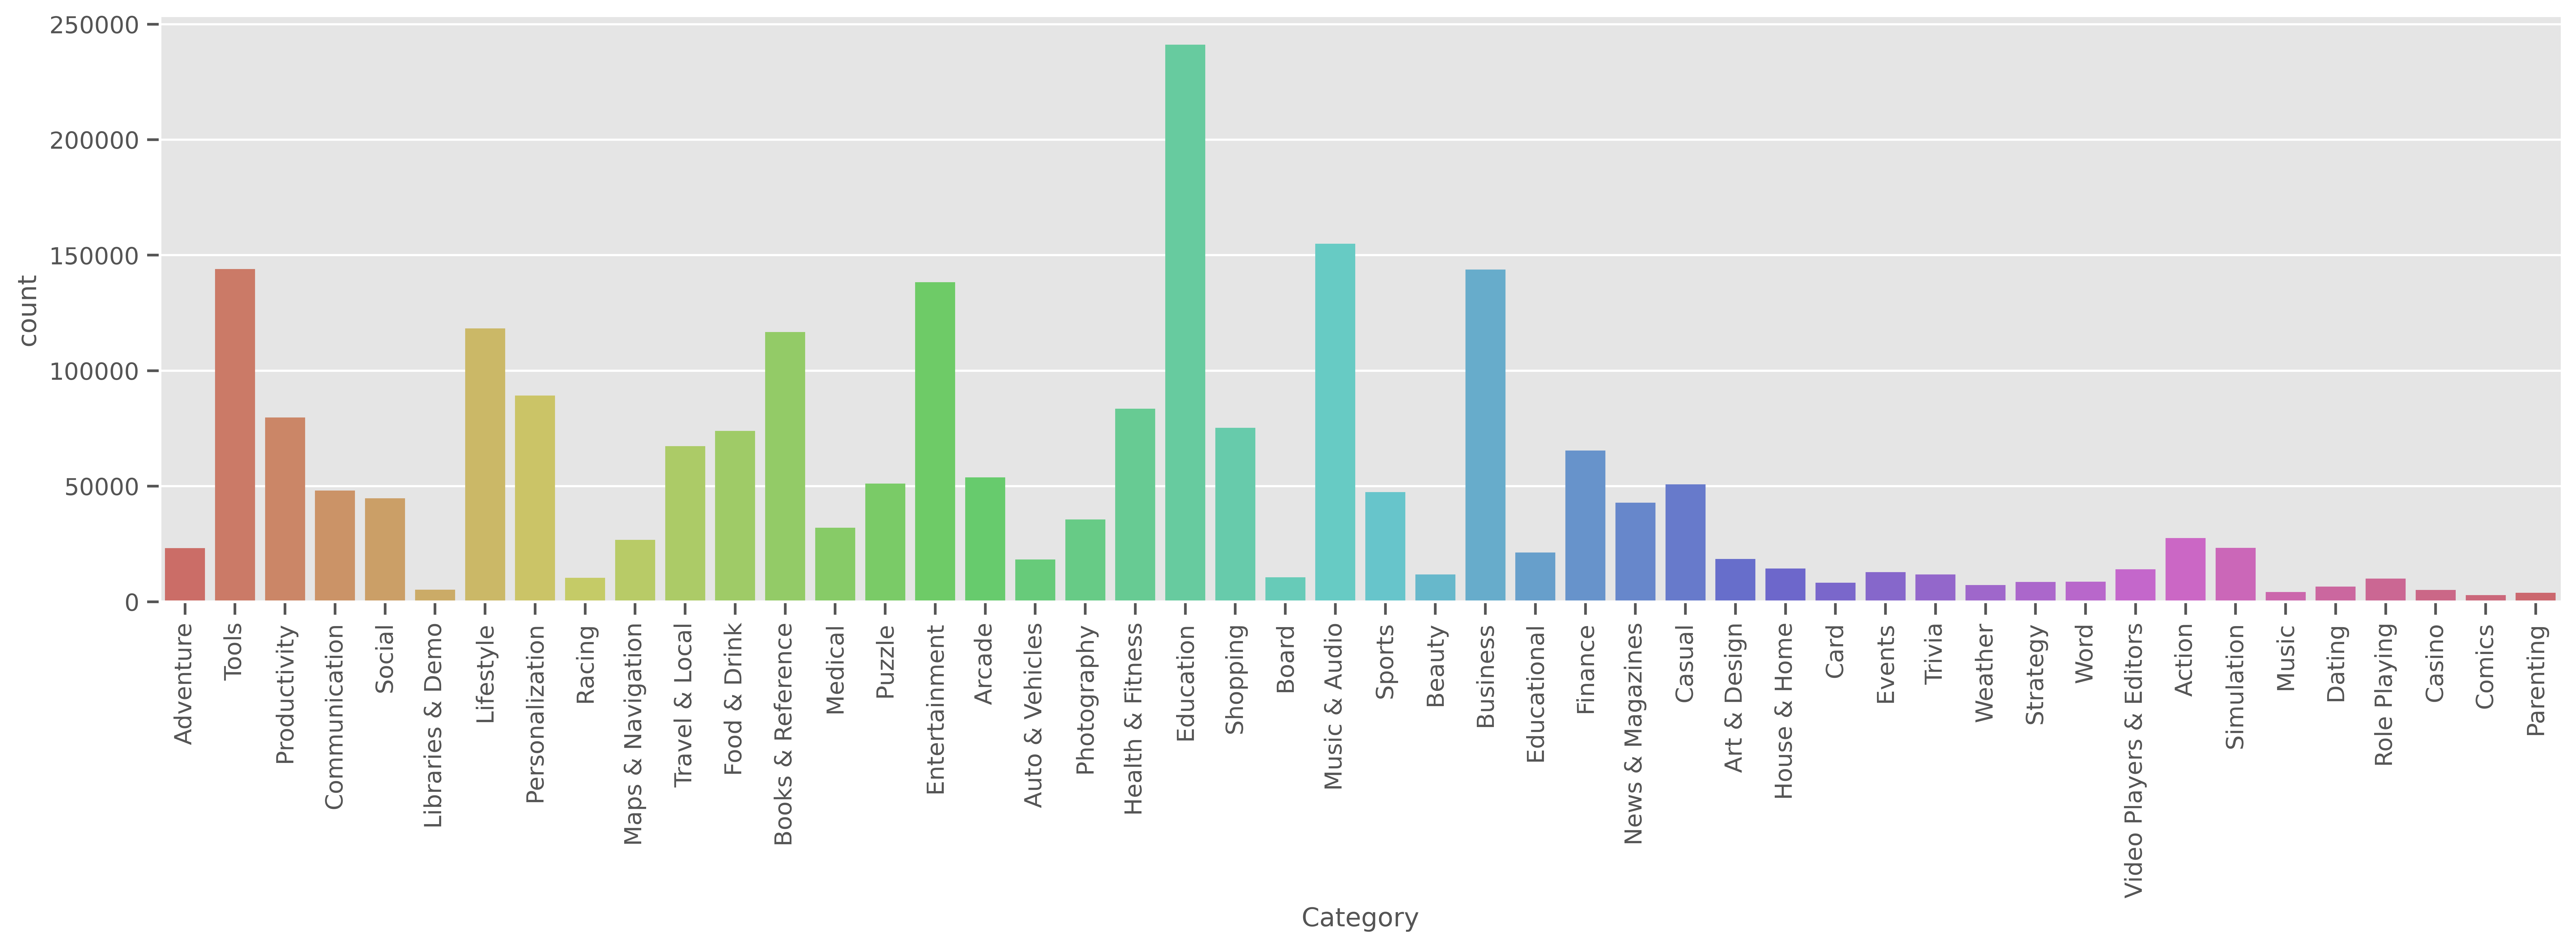

In [40]:
#해당 카테고리가 현재 데이터 셋에 몇개 있는지 plot
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

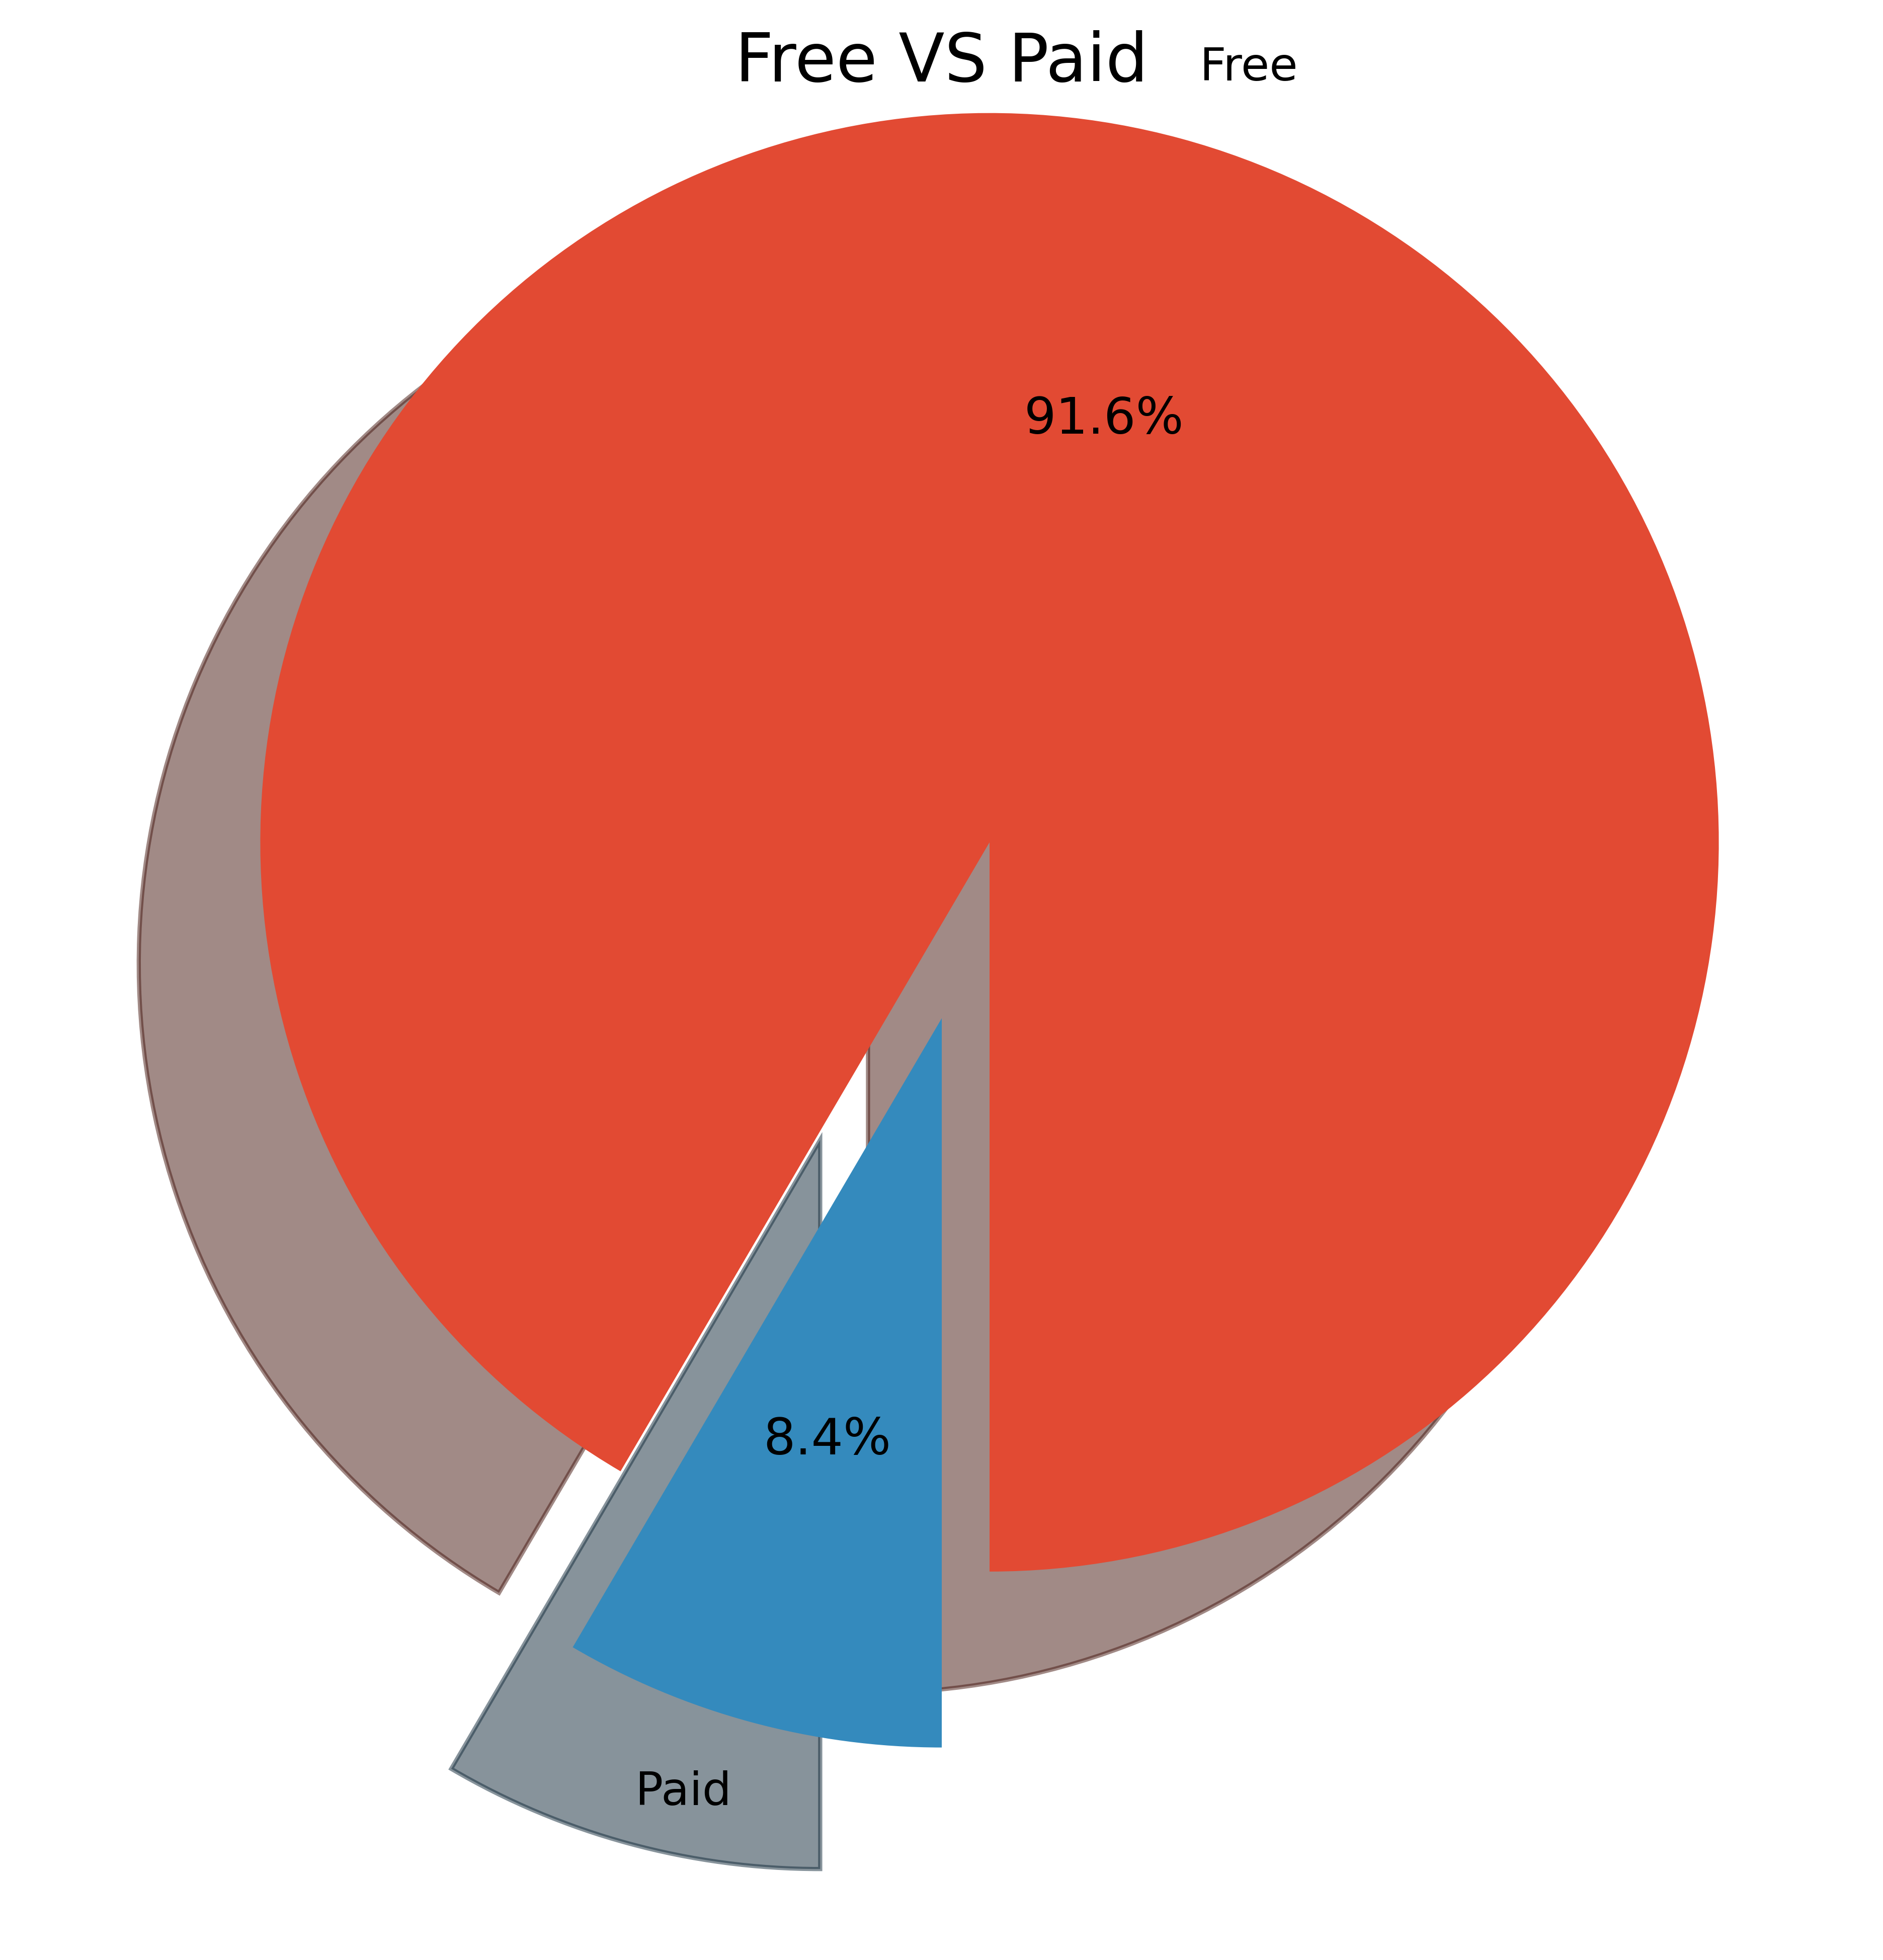

In [41]:
#앱이 유료인지 무료인지 pie char로 plot
plt.figure(figsize=(8,8))
count = df['In App Purchases'].value_counts()
plt.pie(count, explode=(0.25,0), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Free VS Paid', size = 16)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Tools'),
  Text(4, 0, 'Books & Reference'),
  Text(5, 0, 'Personalization'),
  Text(6, 0, 'Lifestyle'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Puzzle'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Arcade'),
  Text(14, 0, 'Travel & Local'),
  Text(15, 0, 'Casual'),
  Text(16, 0, 'Sports'),
  Text(17, 0, 'News & Magazines'),
  Text(18, 0, 'Social'),
  Text(19, 0, 'Communication'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Photography'),
  Text(22, 0, 'Simulation'),
  Text(23, 0, 'Action'),
  Text(24, 0, 'Adventure'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  

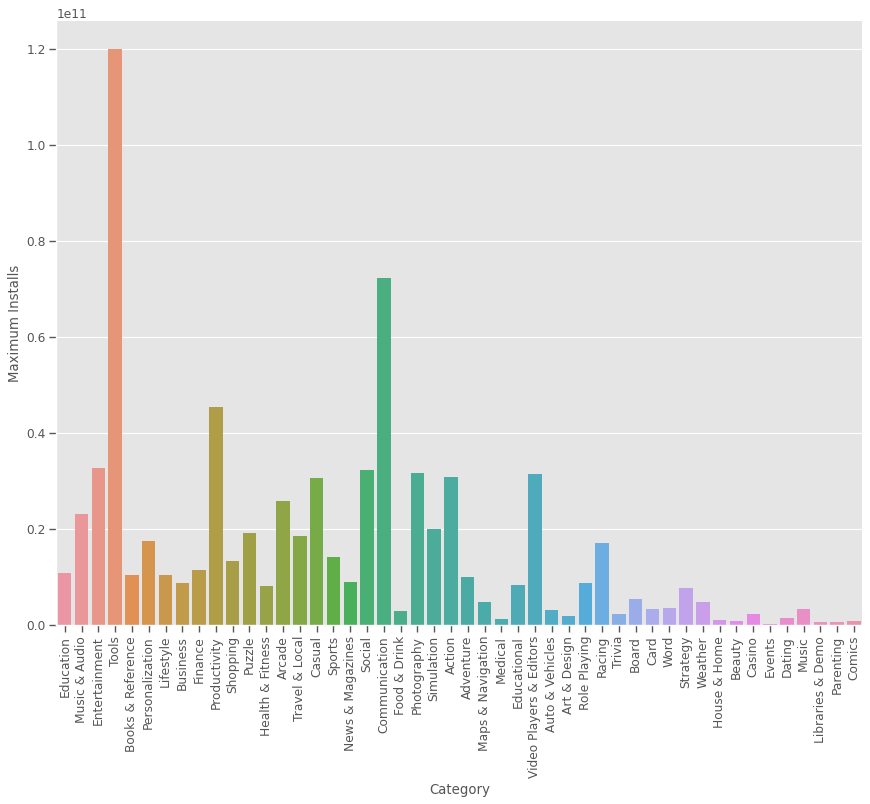

In [20]:
#BoxPlot으로 Category별 Maximum installs Plot
plt.figure(figsize=(13,10), dpi= 80)
ax = sns.barplot(x=category_dist.index, y=category_dist["Maximum Installs"])
plt.xticks(rotation=90)

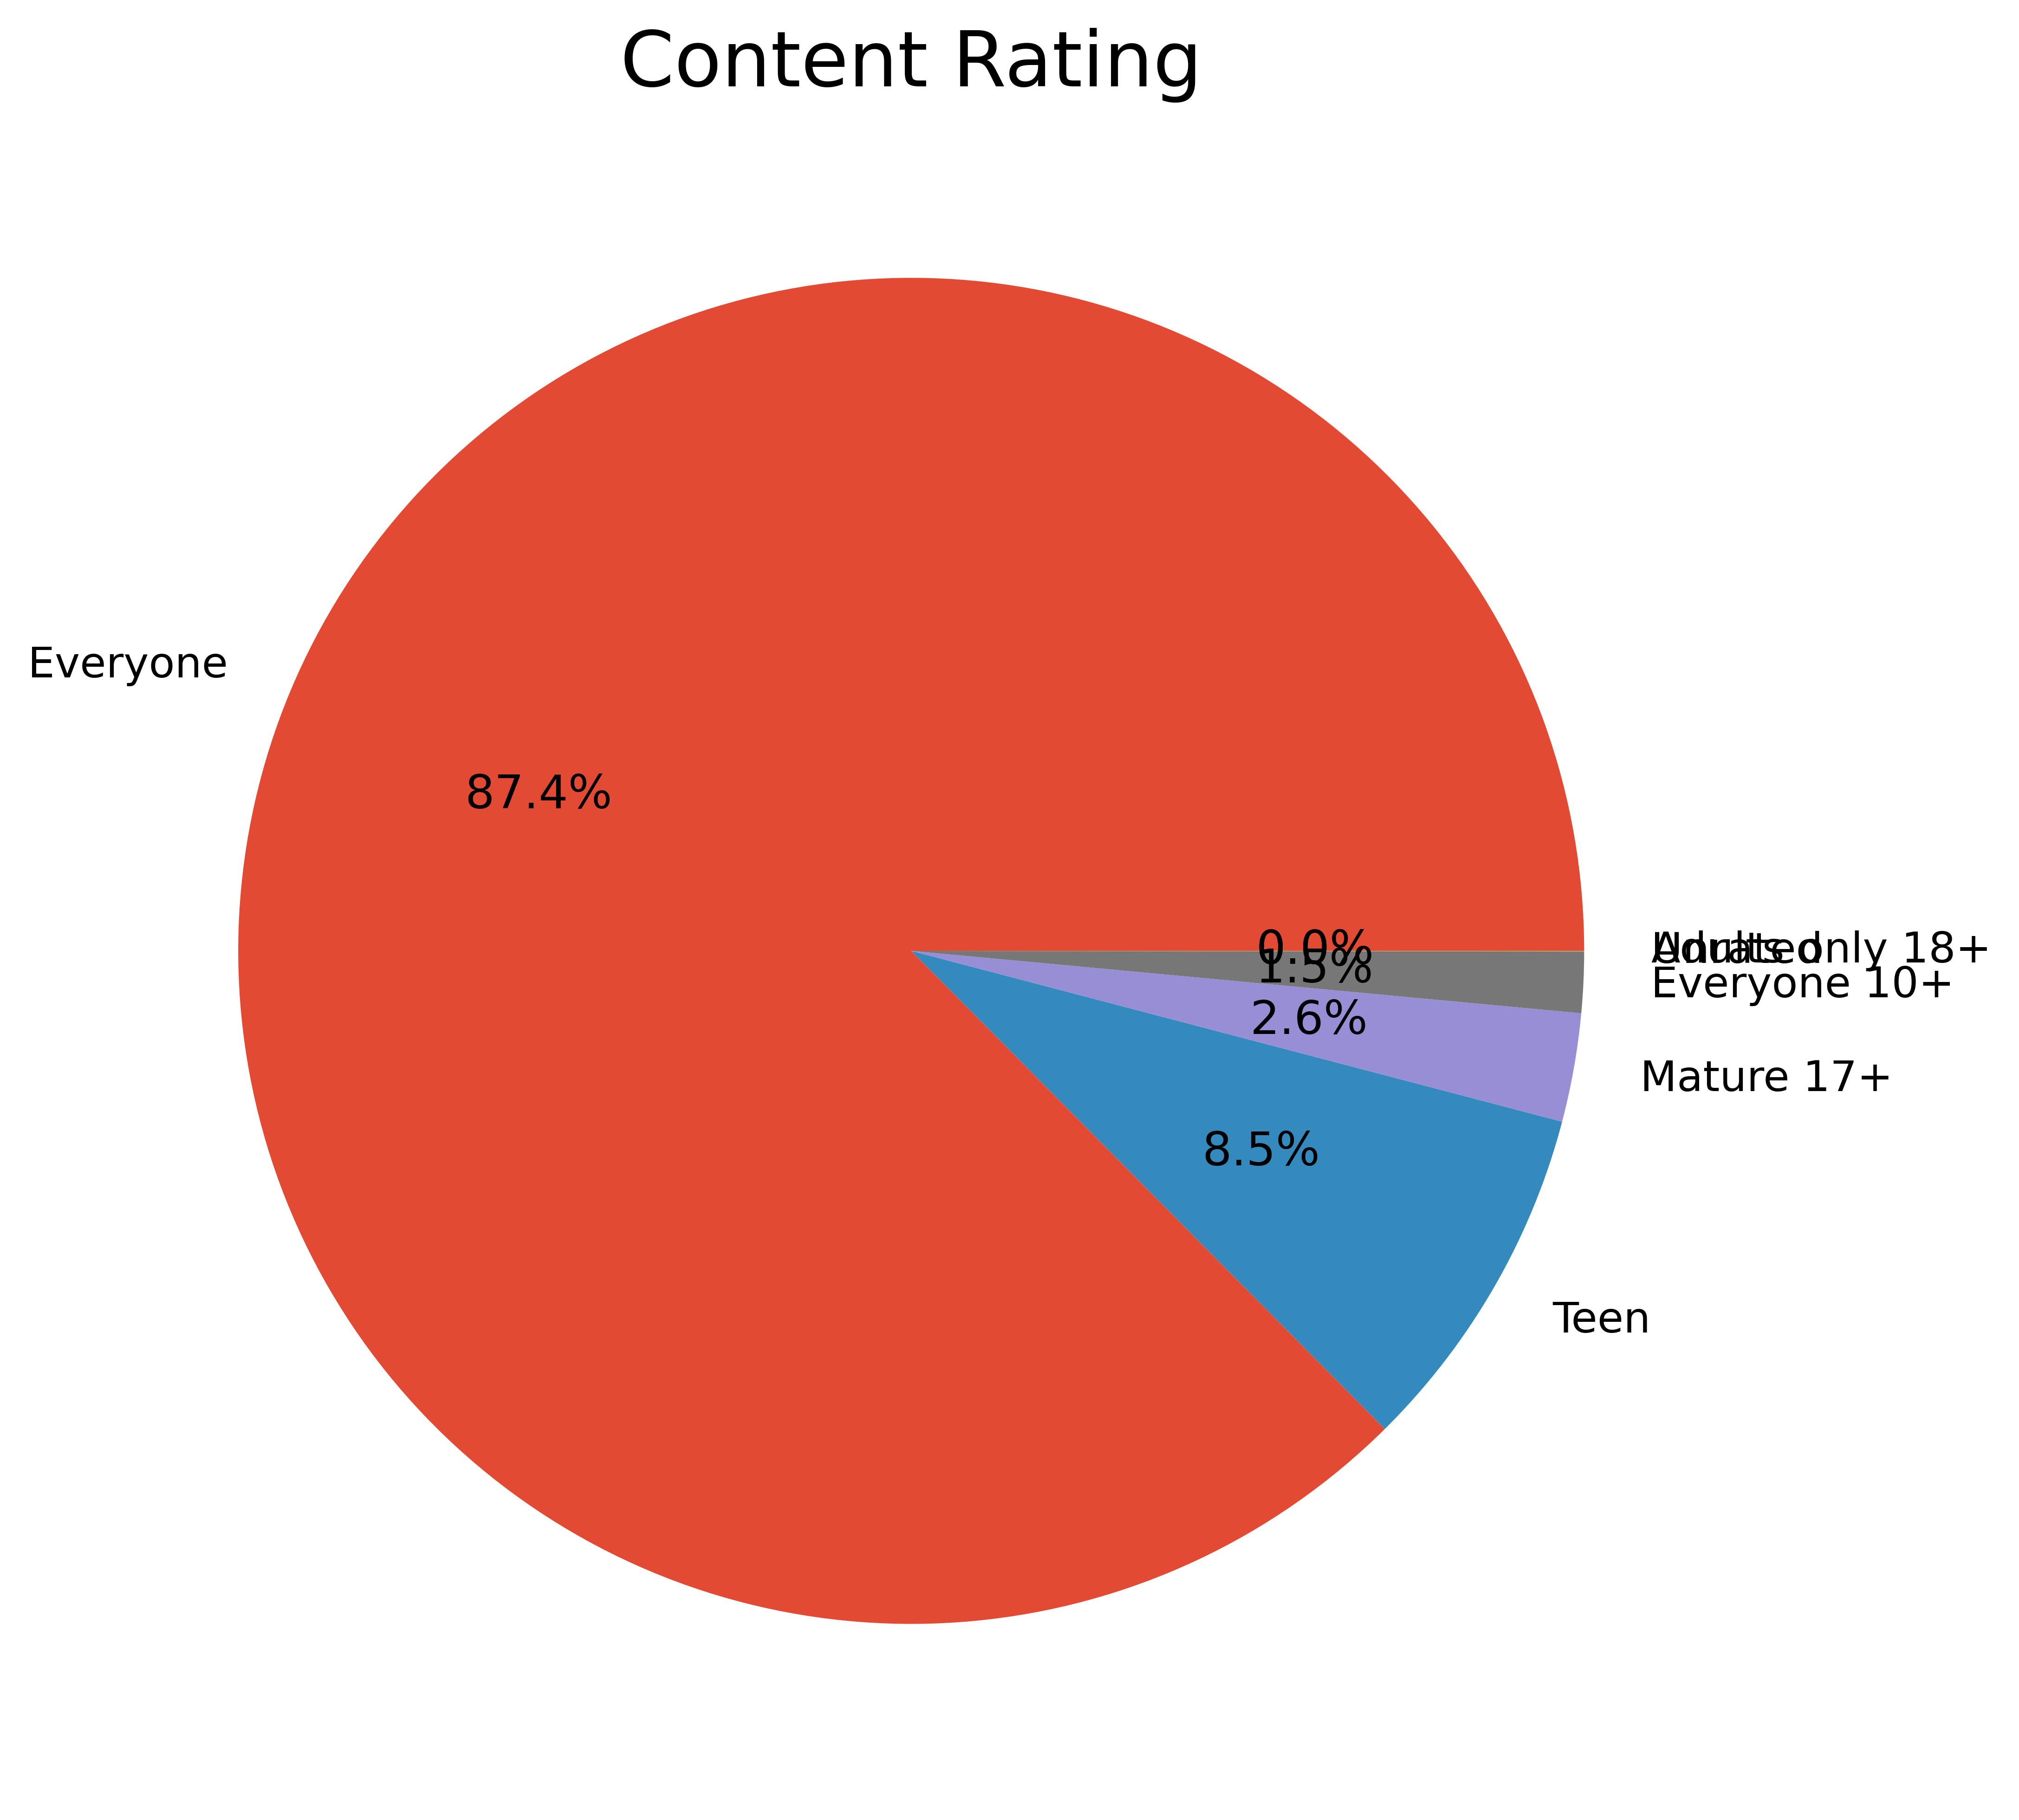

In [21]:
## Pie Chart를 사용하여 연령별 Rating // 혼동을 방지하기 위해 앱 연령제한 으로 통칭함
fig = plt.figure(figsize=(16,8))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False)
plt.title('Content Rating',size = 20)
plt.show()

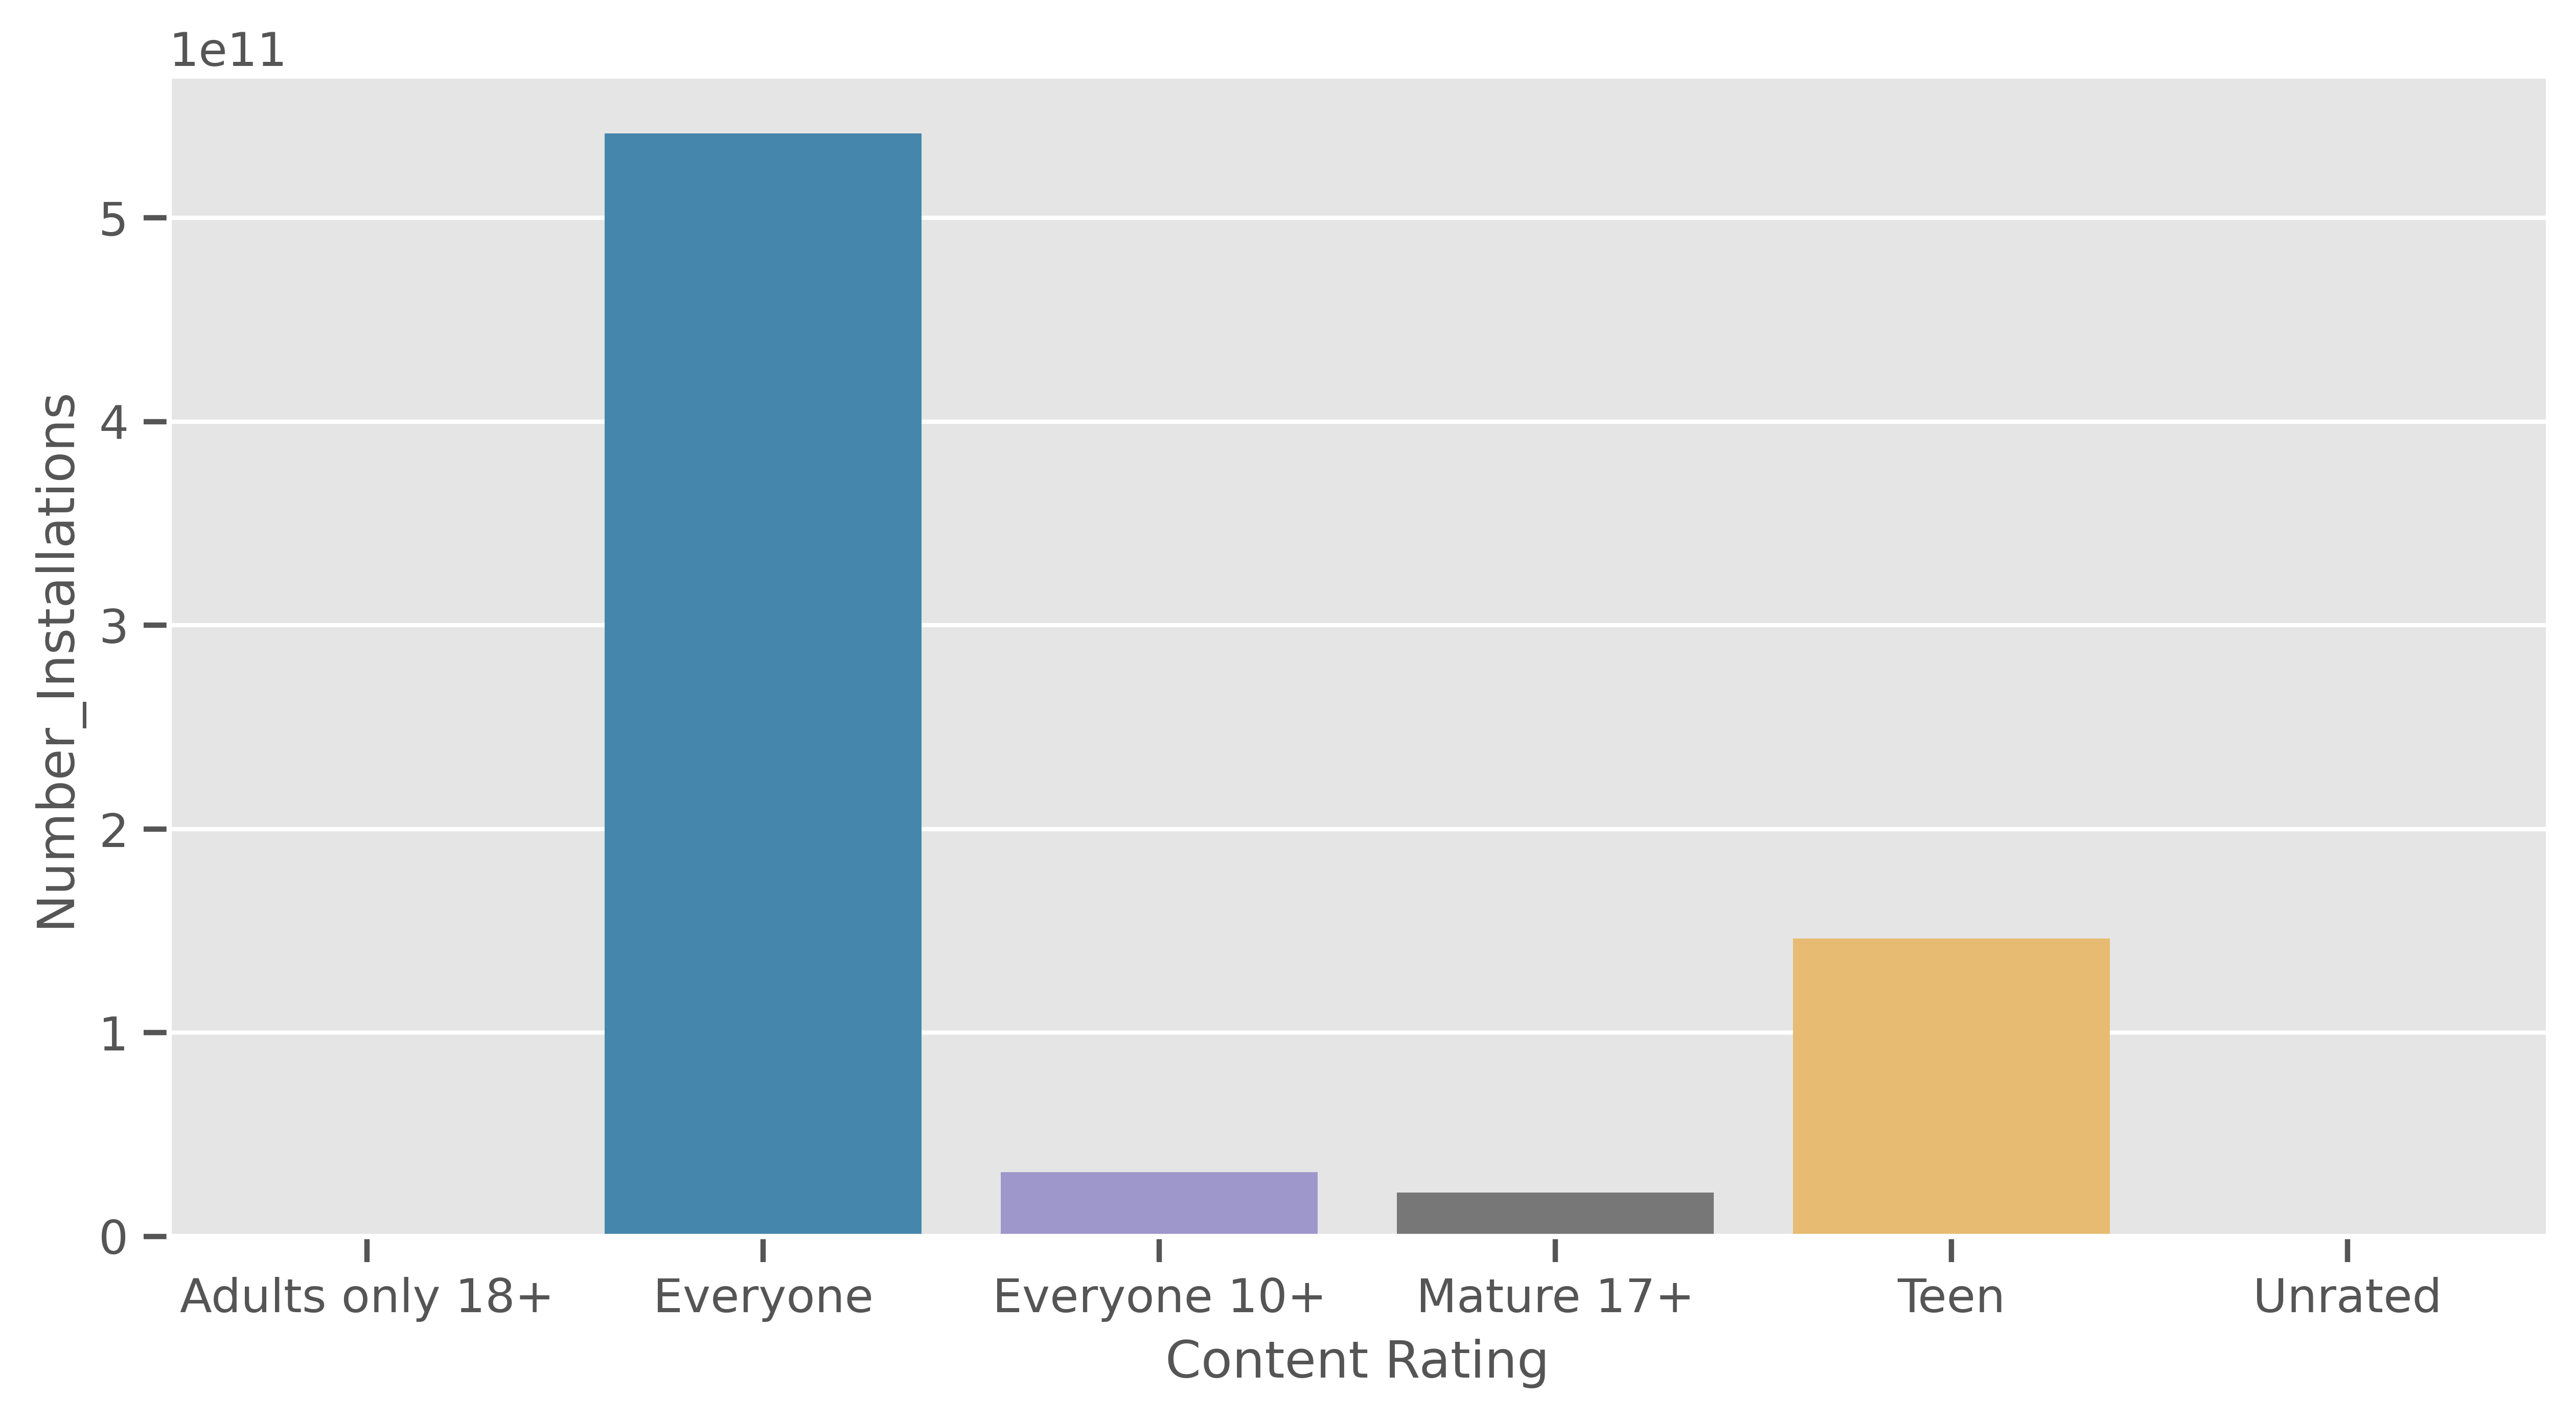

In [22]:
# 앱 연령제한으로 groupby 한 후 Number_installations 수
data_cont =  df.groupby('Content Rating')['Maximum Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.show()

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

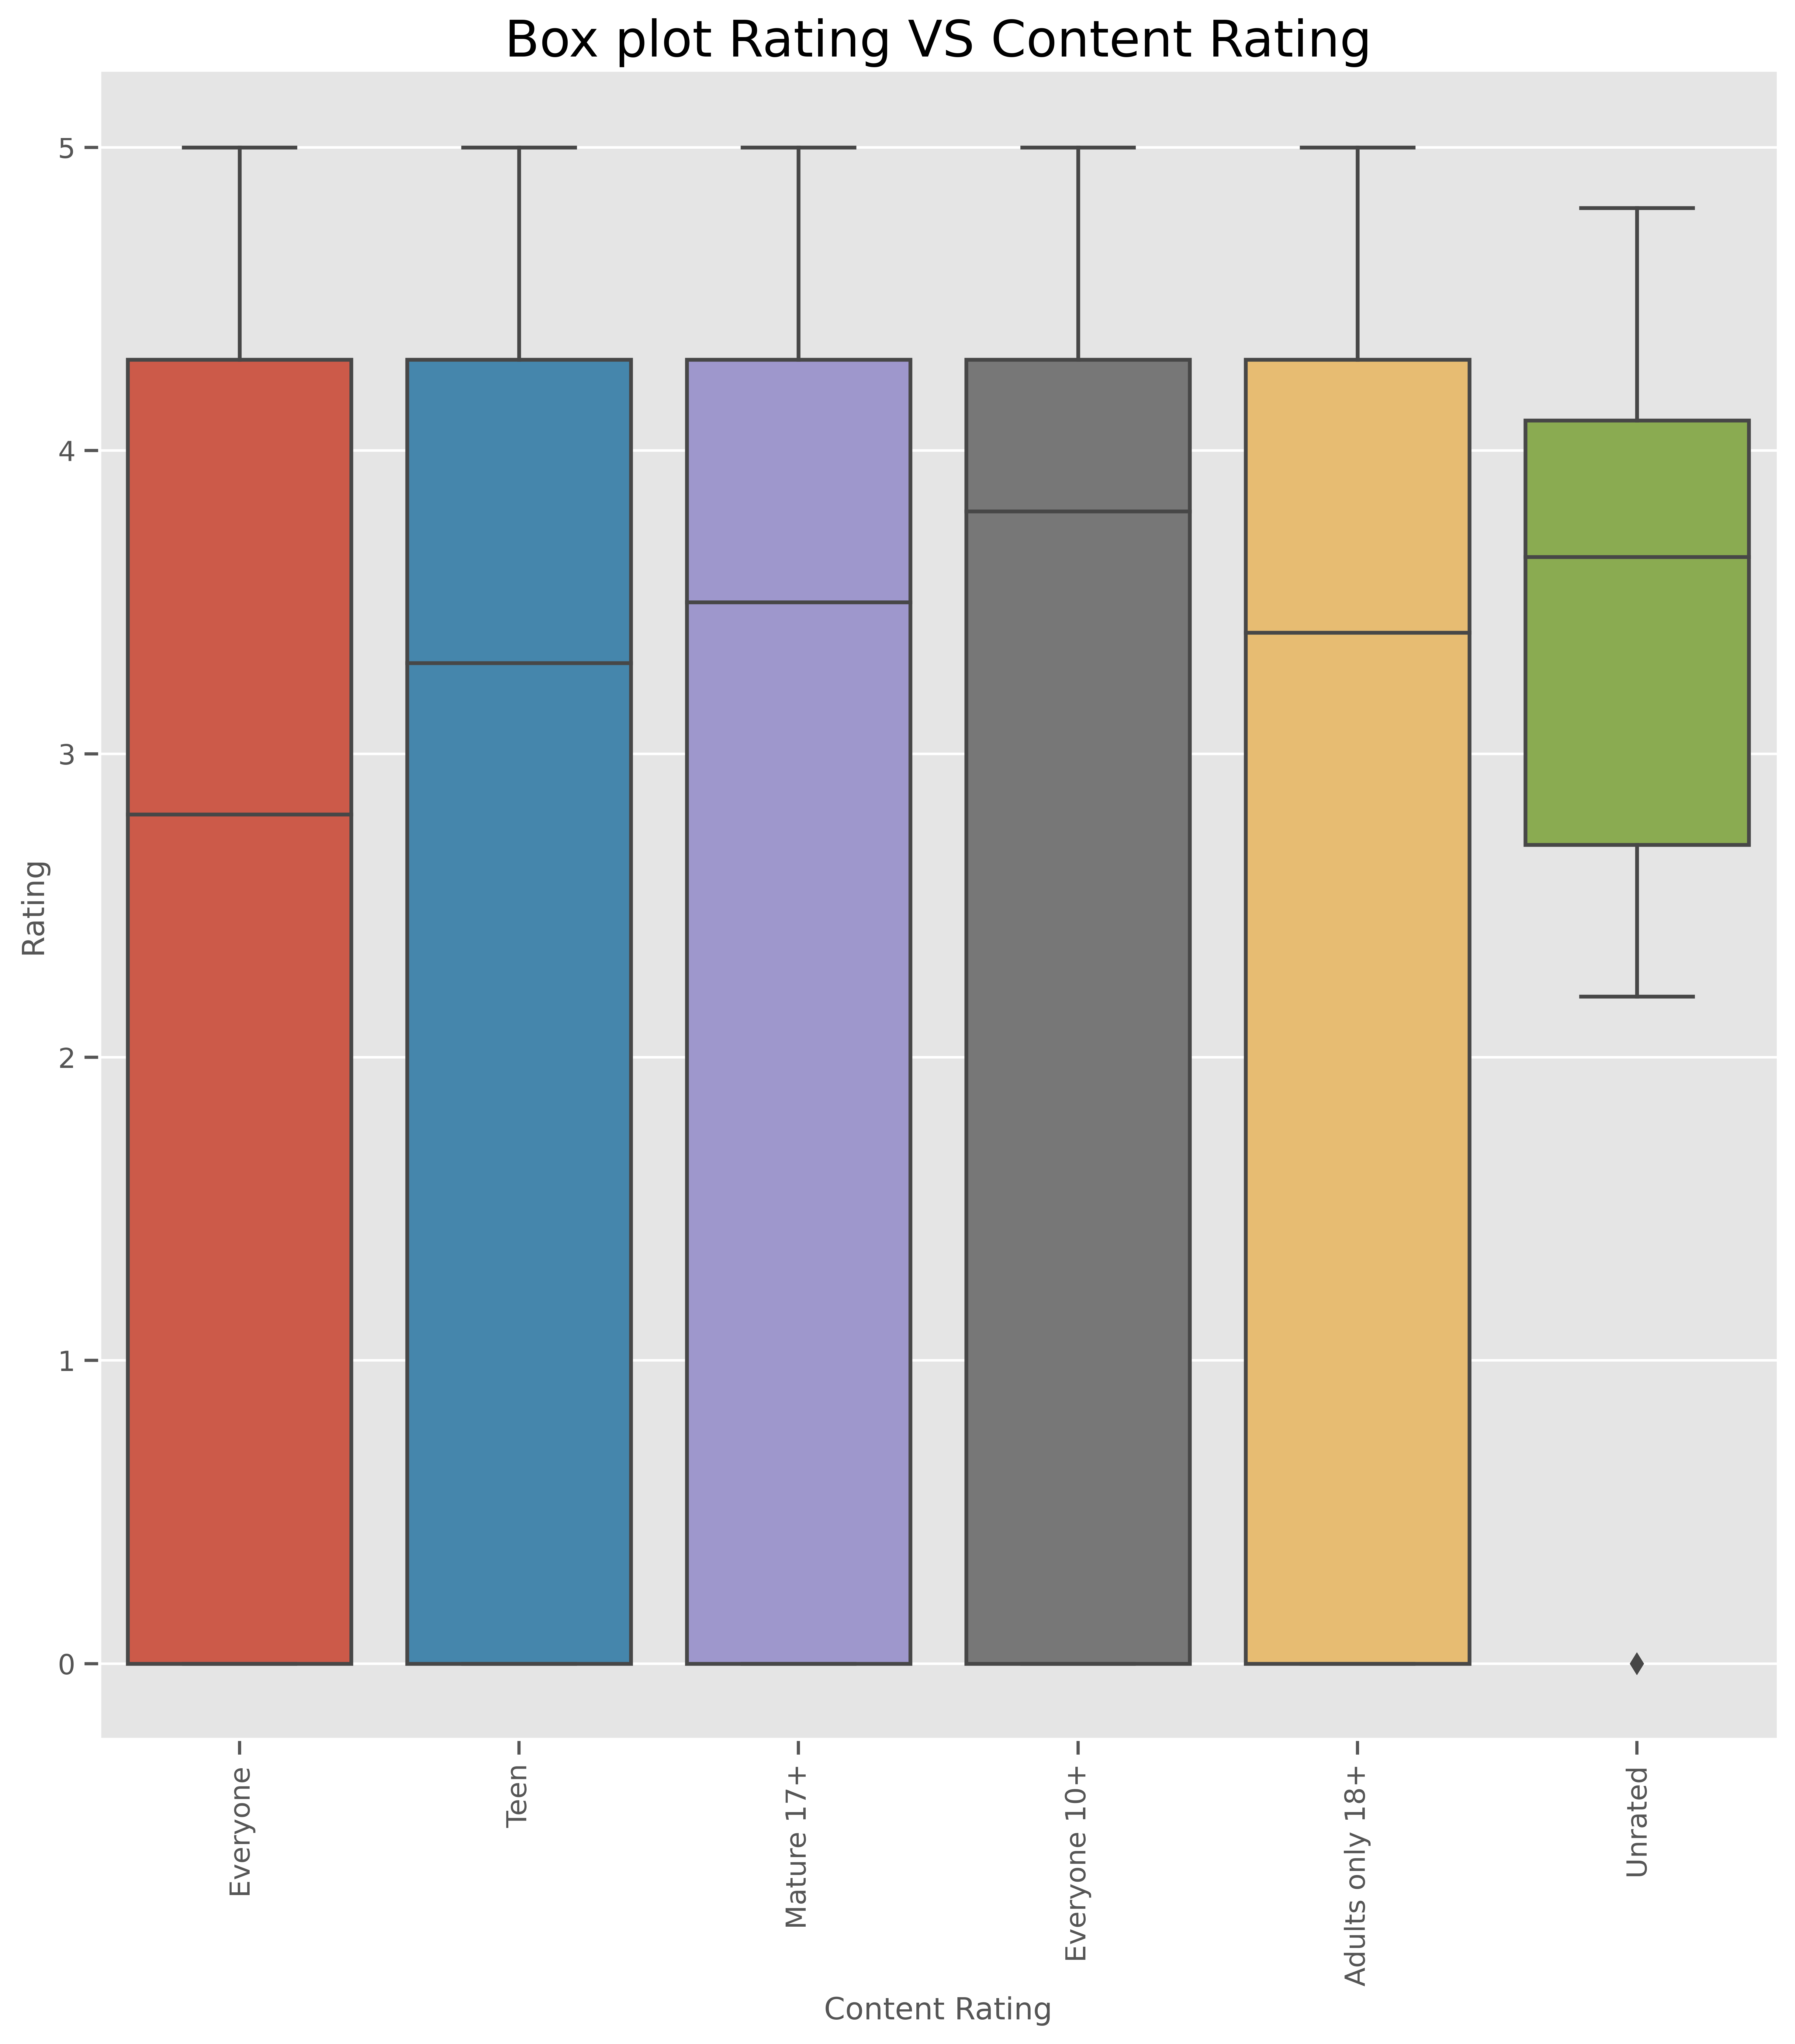

In [23]:
# 앱 연령제한으로 보았을 때 rating(앱 별점)을 box plot으로 plot
_ = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

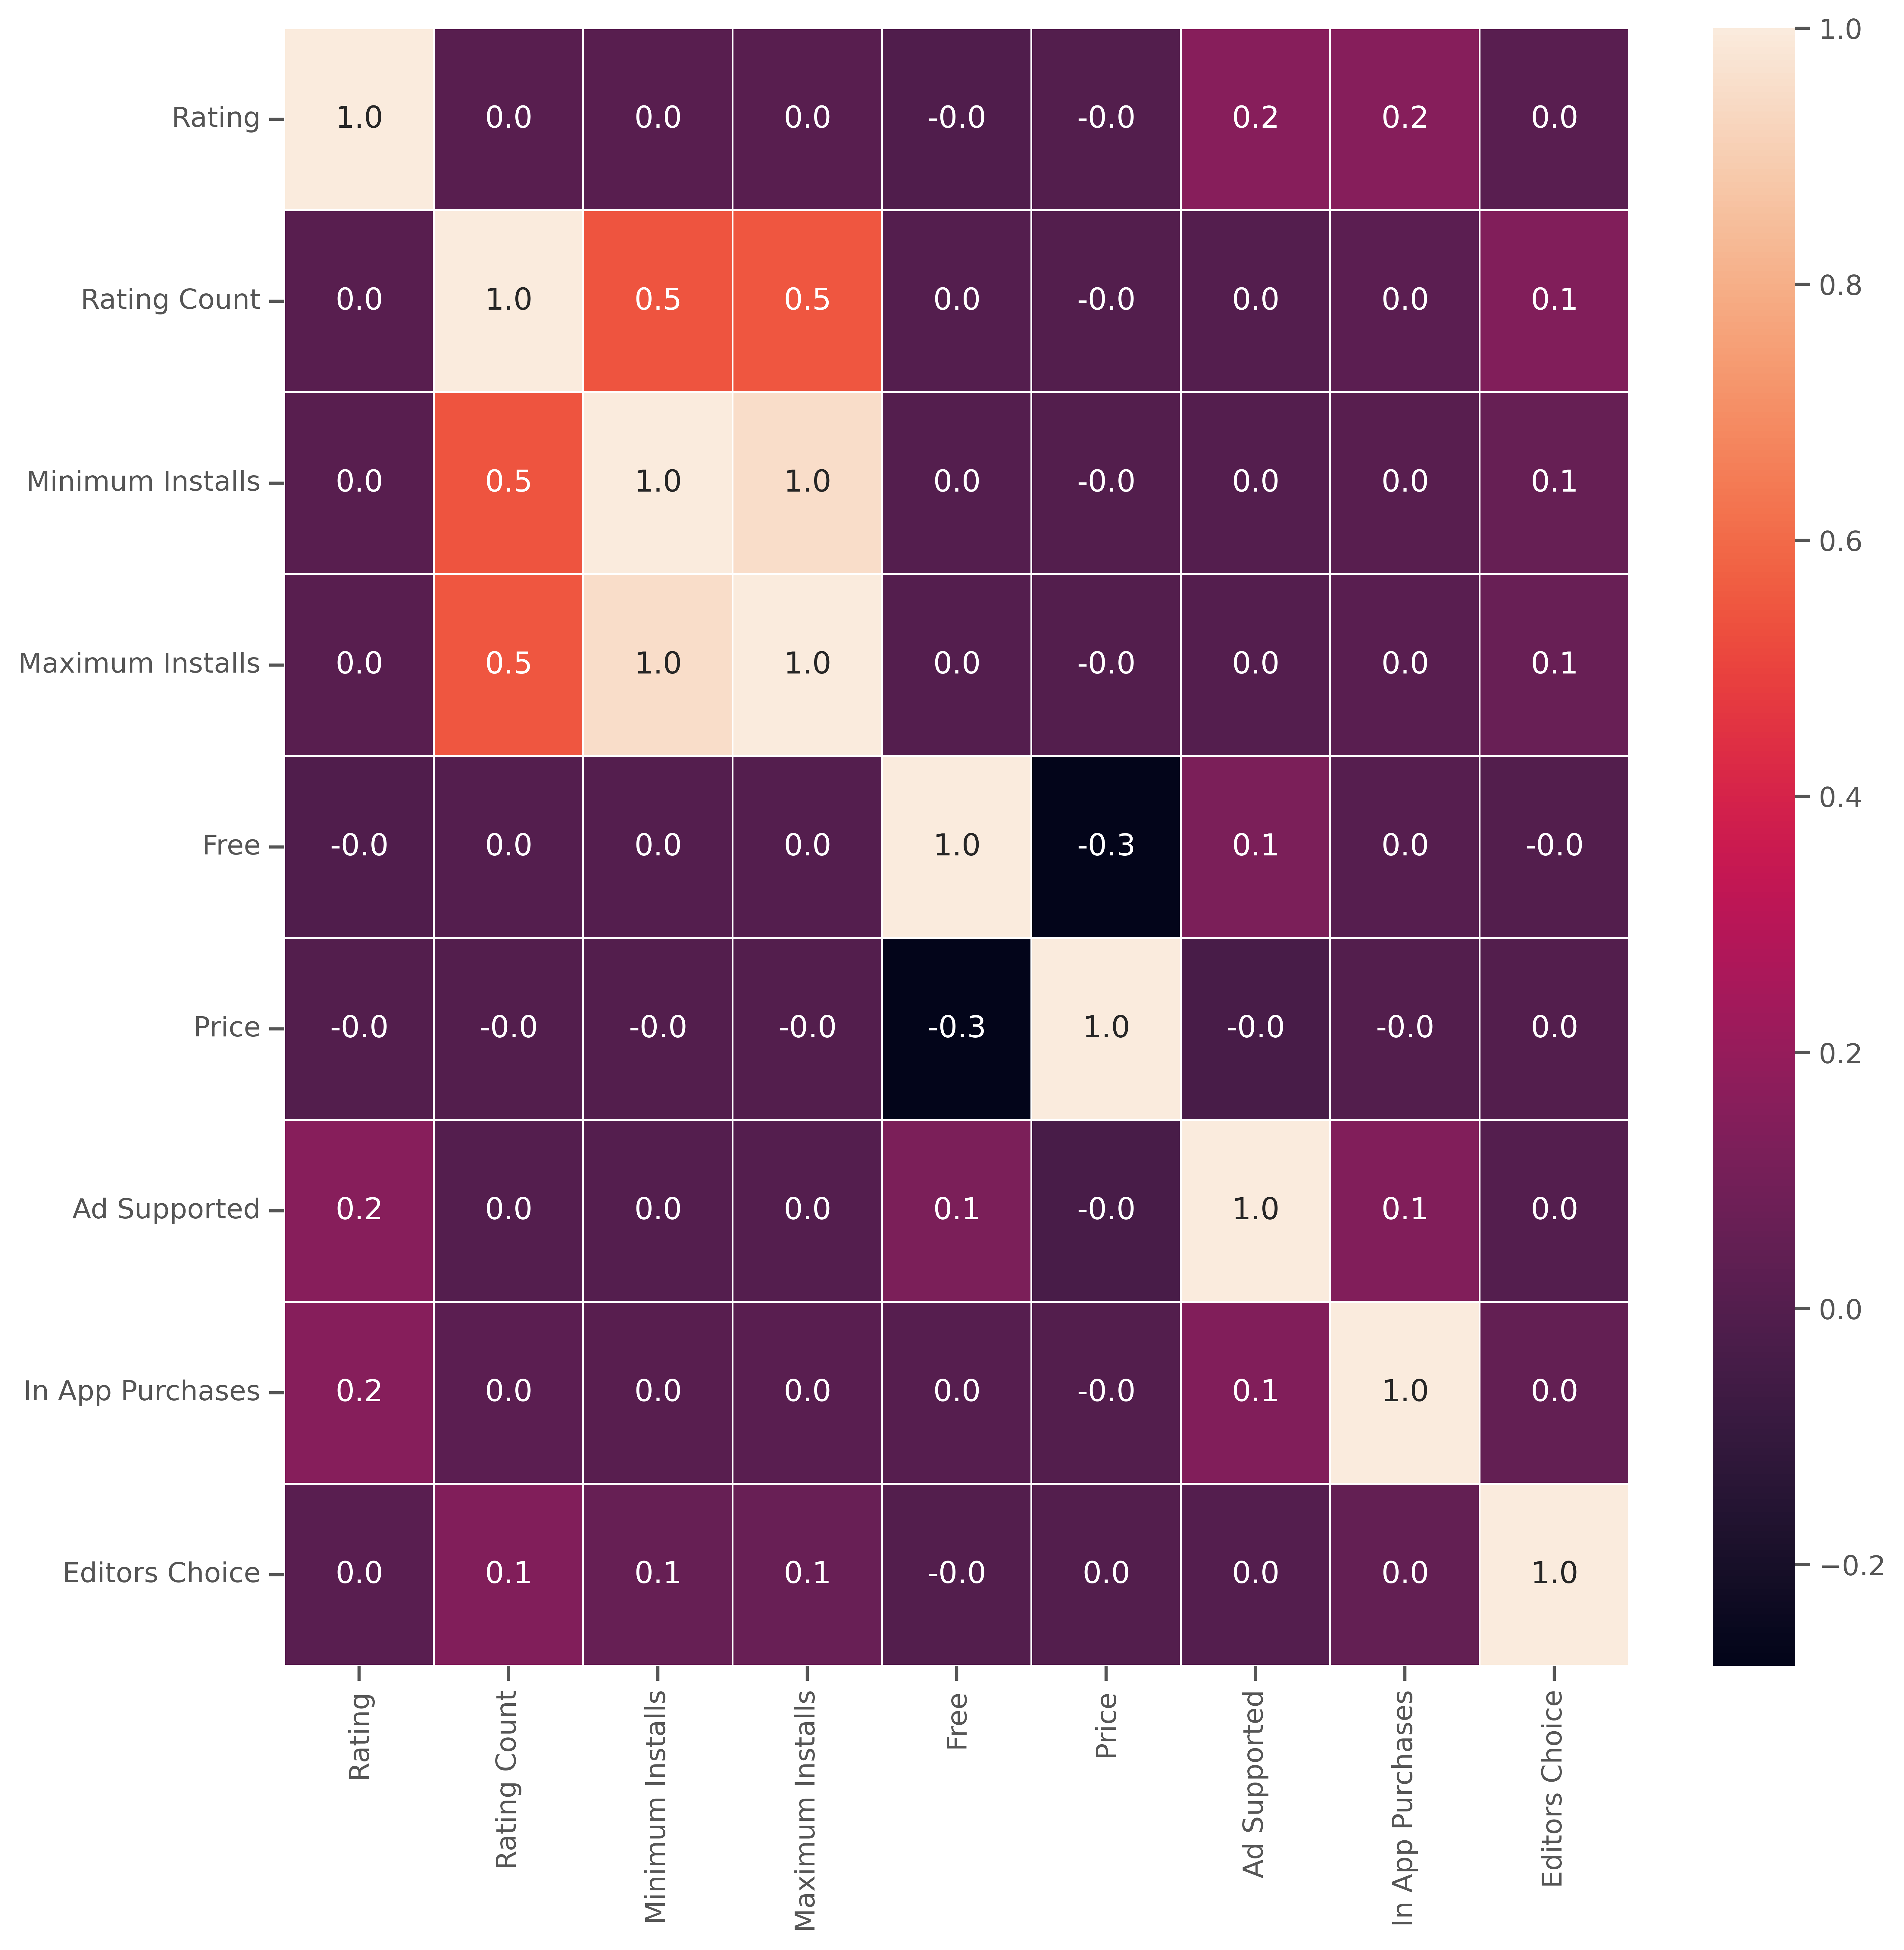

In [24]:

#feature 간 correlation 을 df.corr() 과  heapmap 을 통해 plot
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


In [51]:
df = df.sample(n=20000, replace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1302765 to 1522994
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           20000 non-null  object 
 1   App Id             20000 non-null  object 
 2   Category           20000 non-null  object 
 3   Rating             19798 non-null  float64
 4   Rating Count       19798 non-null  float64
 5   Installs           19999 non-null  object 
 6   Minimum Installs   19999 non-null  float64
 7   Maximum Installs   20000 non-null  int64  
 8   Free               20000 non-null  bool   
 9   Price              20000 non-null  float64
 10  Currency           19999 non-null  object 
 11  Size               20000 non-null  object 
 12  Minimum Android    19927 non-null  object 
 13  Developer Id       20000 non-null  object 
 14  Developer Website  13286 non-null  object 
 15  Developer Email    20000 non-null  object 
 16  Released      

## Sample
여기서부터 Sample에 대한 EDA
원본 데이터 셋과 비교 분석 바람

In [38]:
df.groupby(['Category'])[['Rating', 'Maximum Installs']].agg('sum')\
                    .sort_values(by=['Rating', 'Maximum Installs'], ascending=[False, False])

Rating  Maximum Installs
Category                                   
Education          4547.9          60334832
Music & Audio      3106.7         360685526
Entertainment      3005.7         153624974
Tools              2866.4         712558328
Books & Reference  2514.1          75792602
...                   ...               ...
Libraries & Demo     98.4           2143788
Beauty               85.2            978384
Dating               76.9           1649469
Music                57.5            838743
Comics               45.0            819982

[48 rows x 2 columns]

In [39]:
(df.groupby(['Category']).agg('sum')['Rating']
                    .transform(lambda x: x/x.sum())*100)\
                    .to_frame().sort_values(by='Rating', ascending=False)


Rating
Category                    
Education          10.428261
Music & Audio       7.123612
Entertainment       6.892021
Tools               6.572608
Books & Reference   5.764790
...                      ...
Libraries & Demo    0.225630
Beauty              0.195362
Dating              0.176330
Music               0.131847
Comics              0.103184

[48 rows x 1 columns]

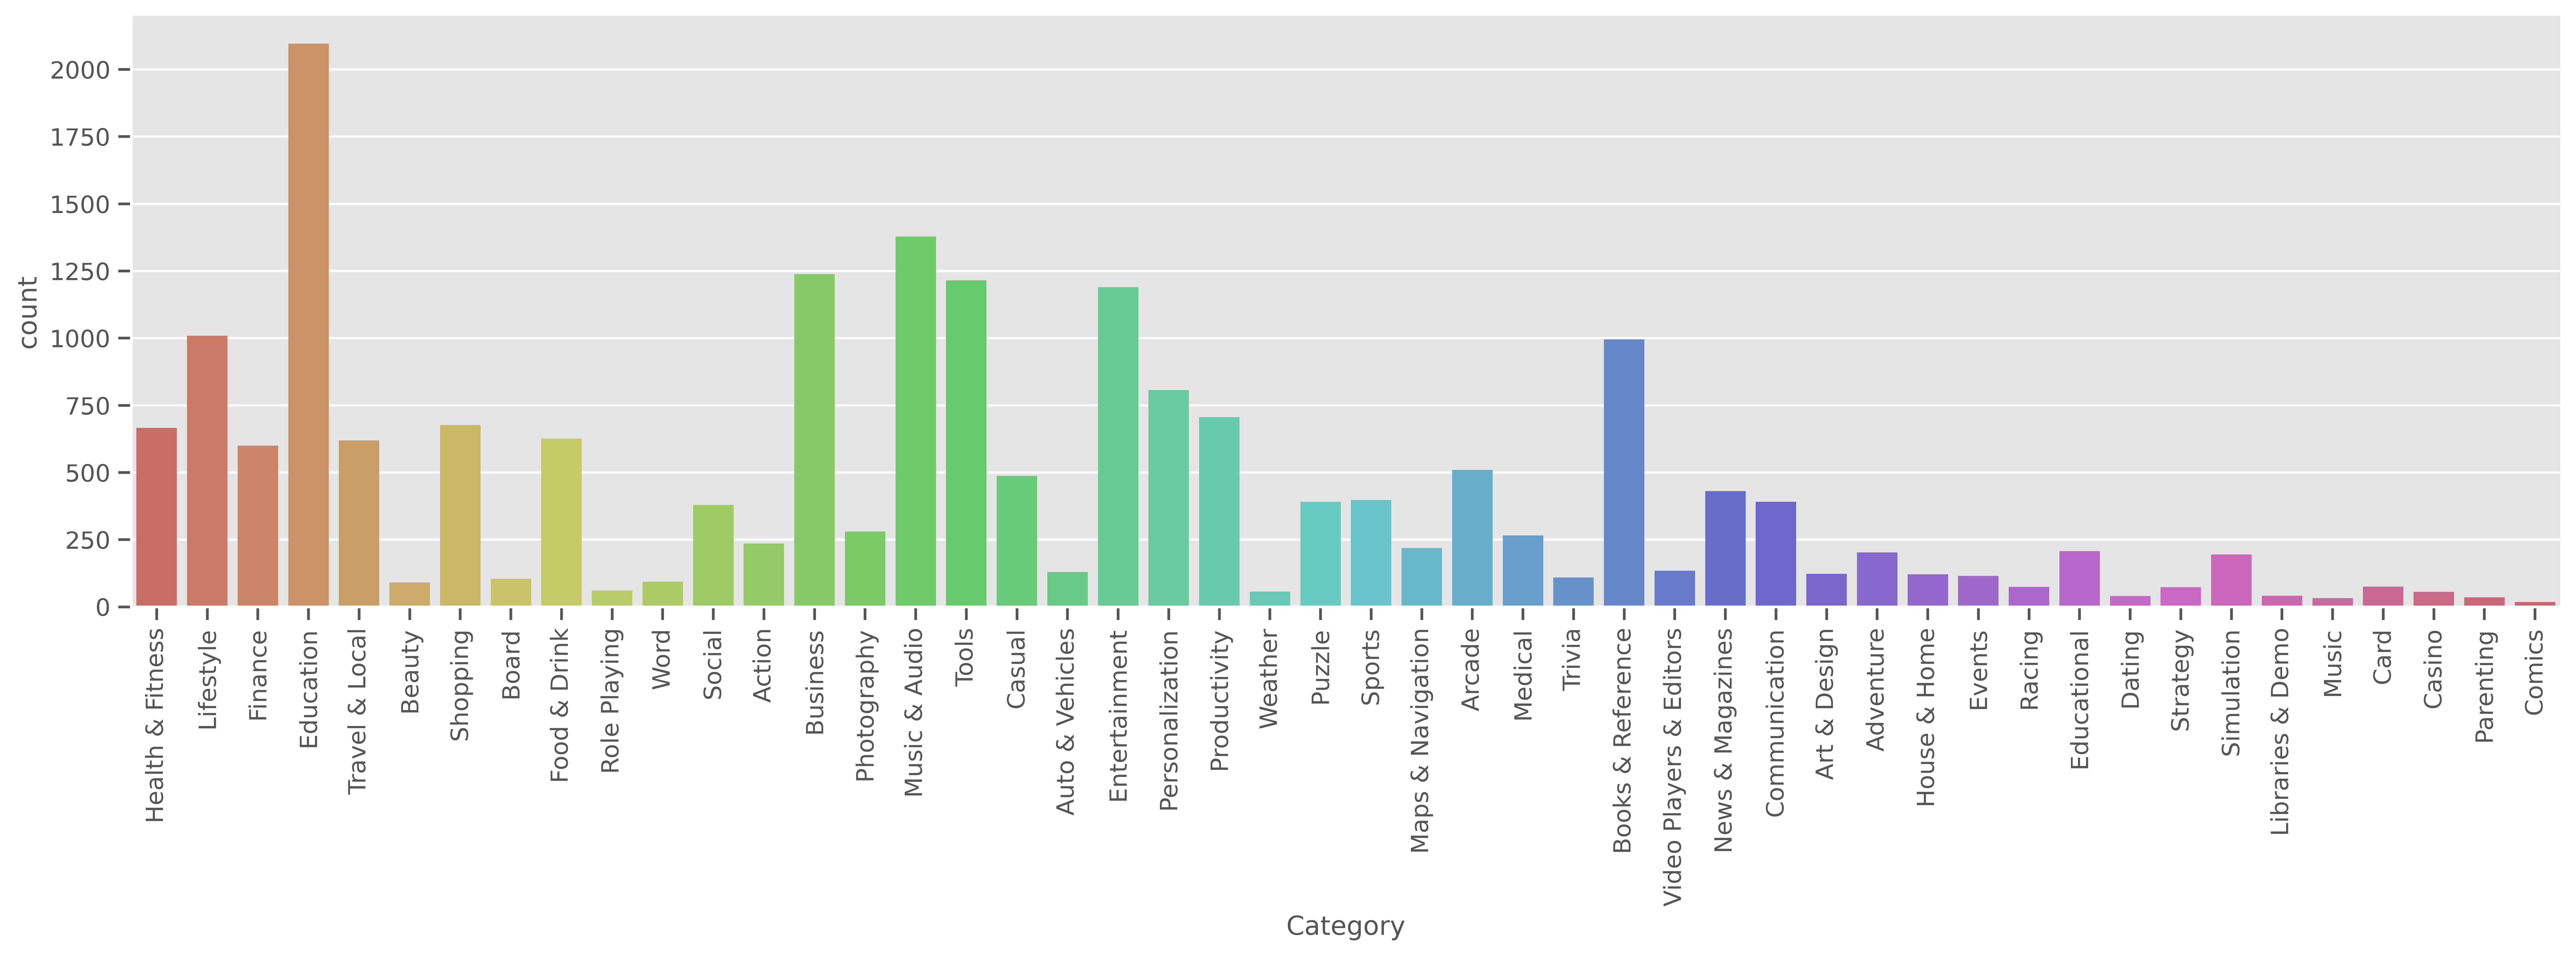

In [40]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

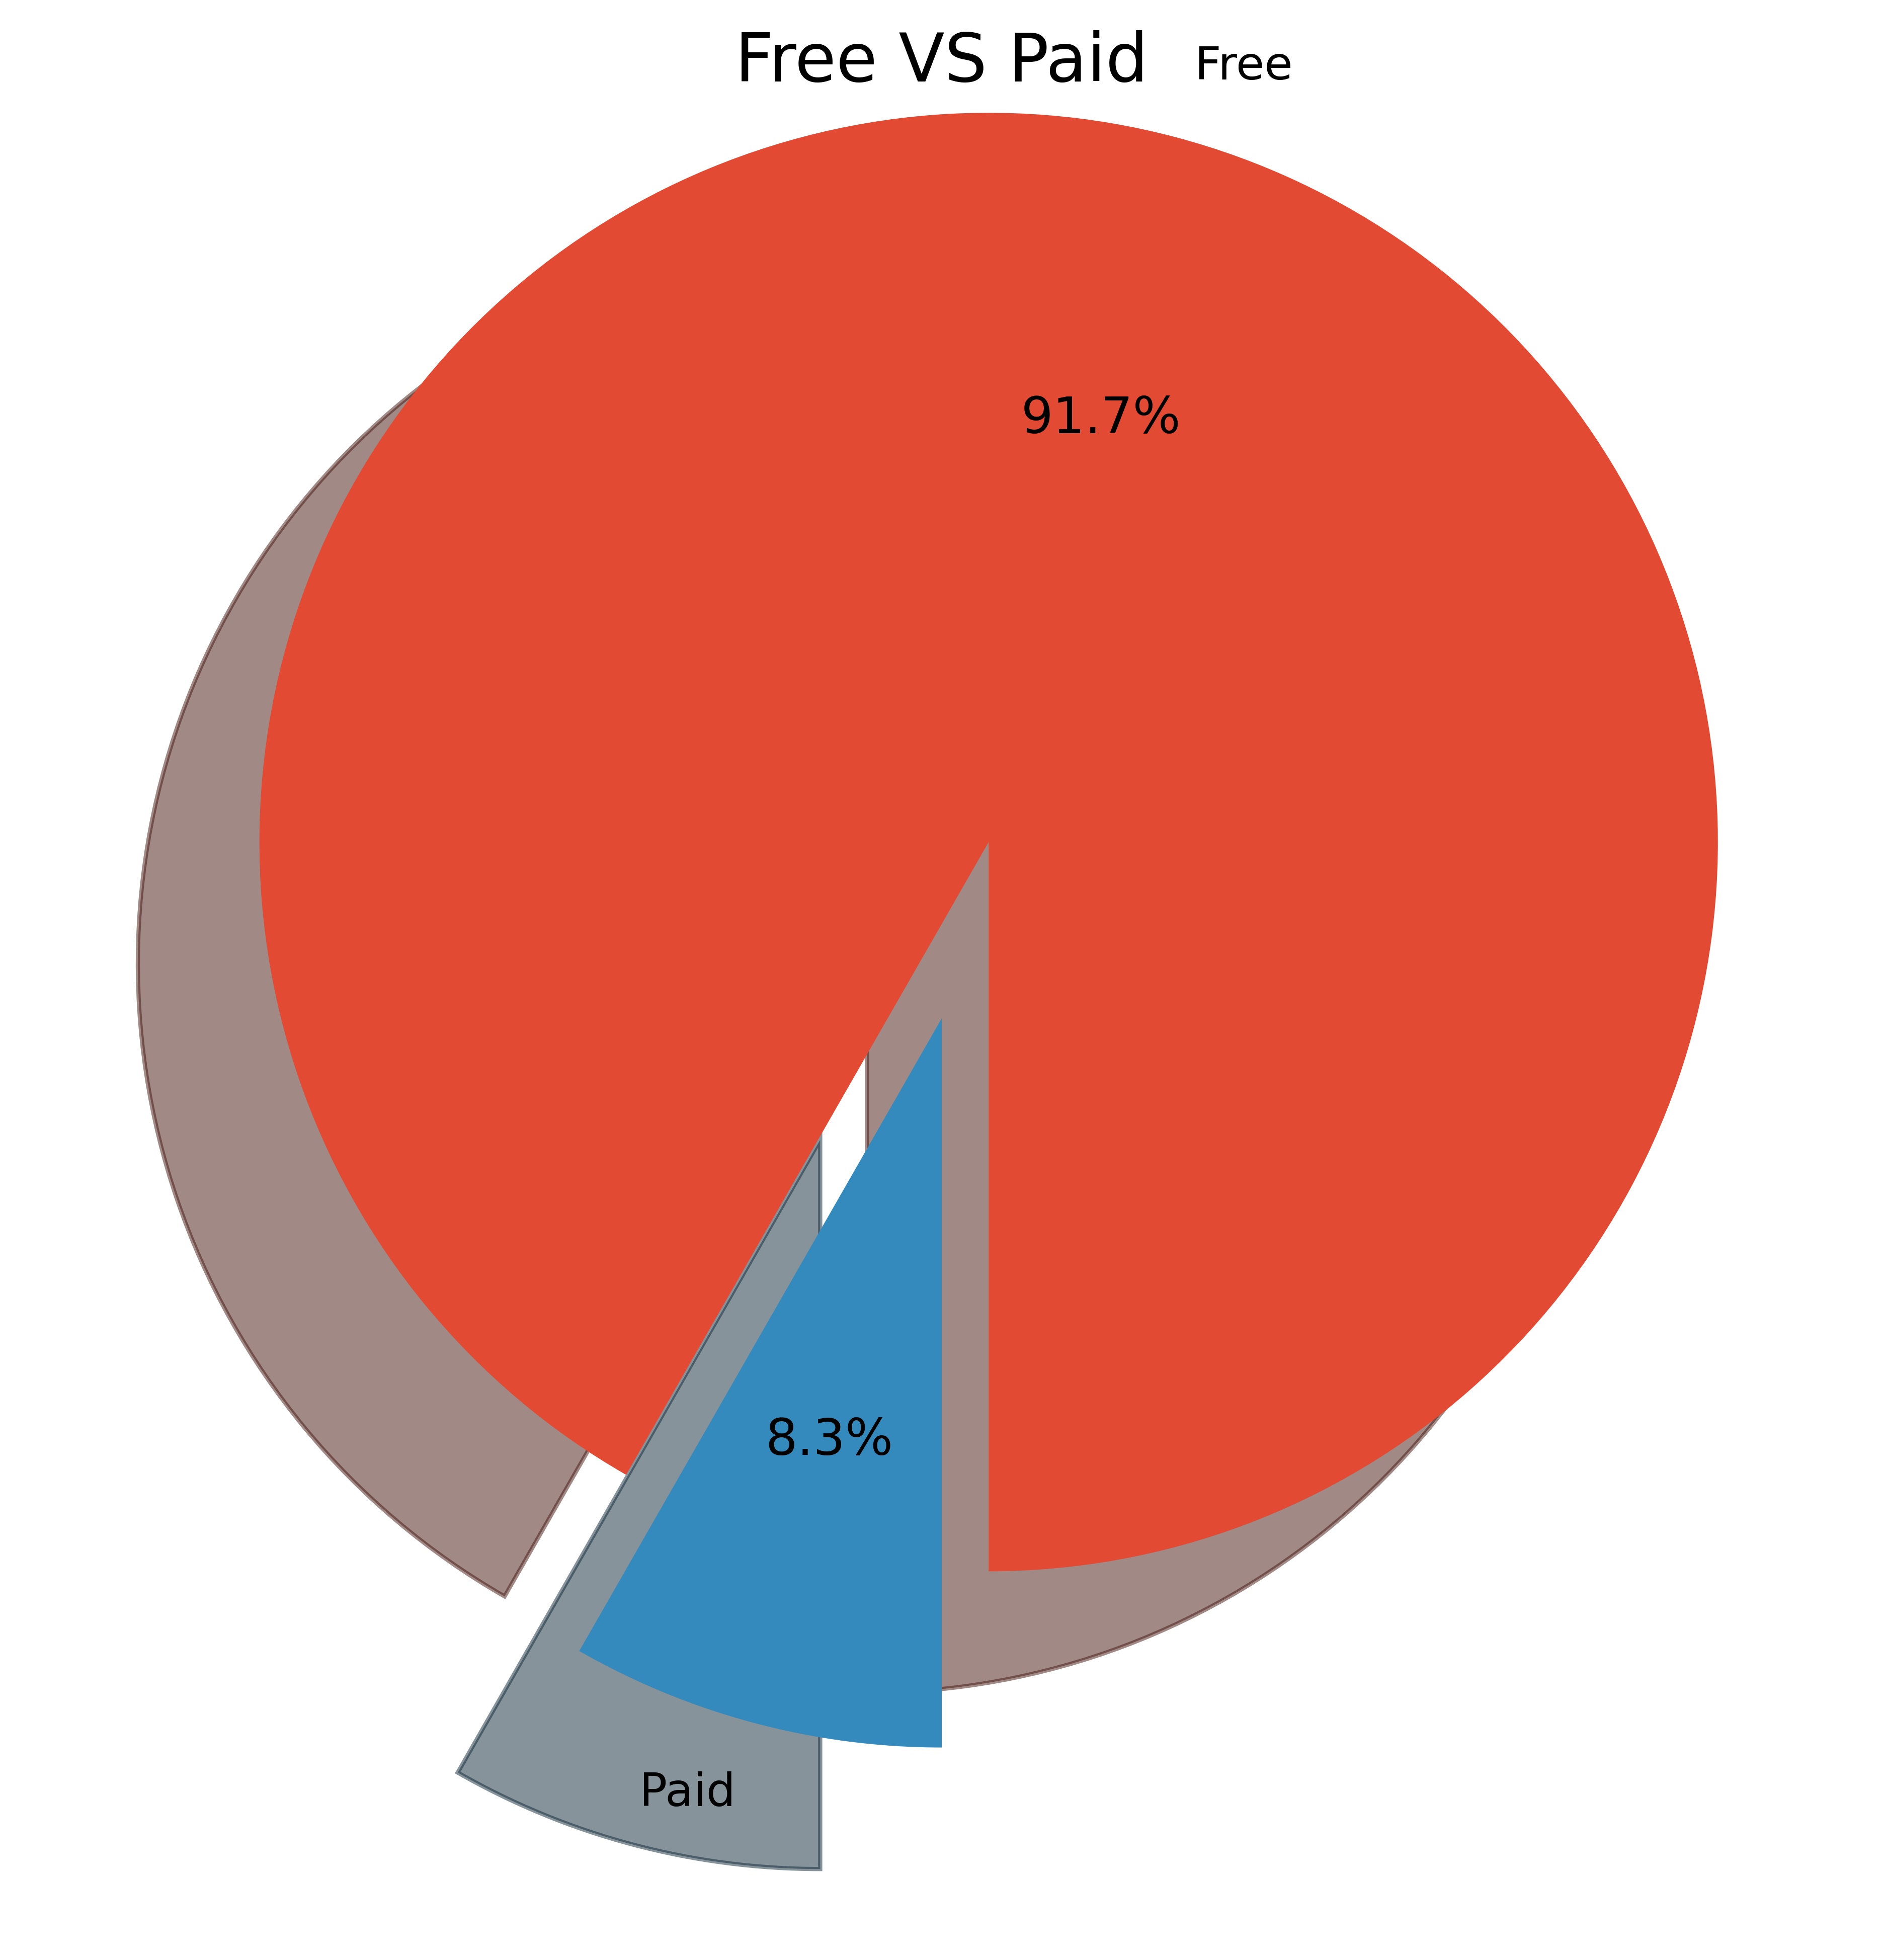

In [41]:
plt.figure(figsize=(8,8))
count = df['In App Purchases'].value_counts()
plt.pie(count, explode=(0.25,0), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Free VS Paid', size = 16)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Tools'),
  Text(4, 0, 'Books & Reference'),
  Text(5, 0, 'Personalization'),
  Text(6, 0, 'Lifestyle'),
  Text(7, 0, 'Business'),
  Text(8, 0, 'Finance'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Puzzle'),
  Text(12, 0, 'Health & Fitness'),
  Text(13, 0, 'Arcade'),
  Text(14, 0, 'Travel & Local'),
  Text(15, 0, 'Casual'),
  Text(16, 0, 'Sports'),
  Text(17, 0, 'News & Magazines'),
  Text(18, 0, 'Social'),
  Text(19, 0, 'Communication'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Photography'),
  Text(22, 0, 'Simulation'),
  Text(23, 0, 'Action'),
  Text(24, 0, 'Adventure'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  

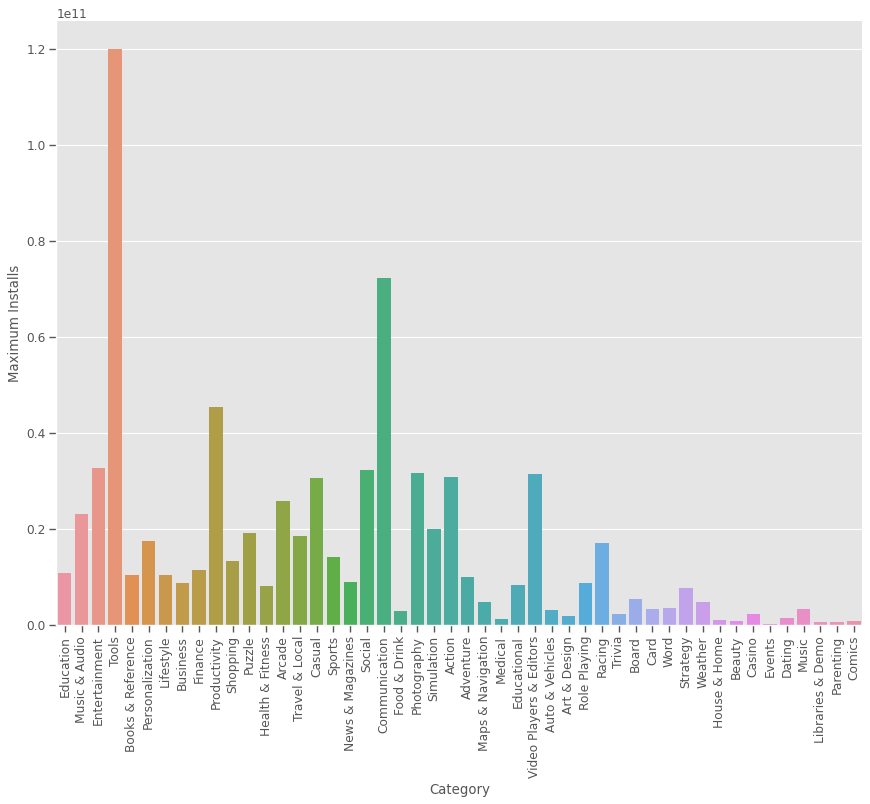

In [42]:
#BoxPlot으로 Category별 Maximum installs Plotting
plt.figure(figsize=(13,10), dpi= 80)
ax = sns.barplot(x=category_dist.index, y=category_dist["Maximum Installs"])
plt.xticks(rotation=90)

In [ ]:
# Pie Chart를 사용하여 연령별 Rating 분포를 조사
fig = plt.figure(figsize=(16,8))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=False)
plt.title('Sample - Content Rating',size = 20)

plt.show()

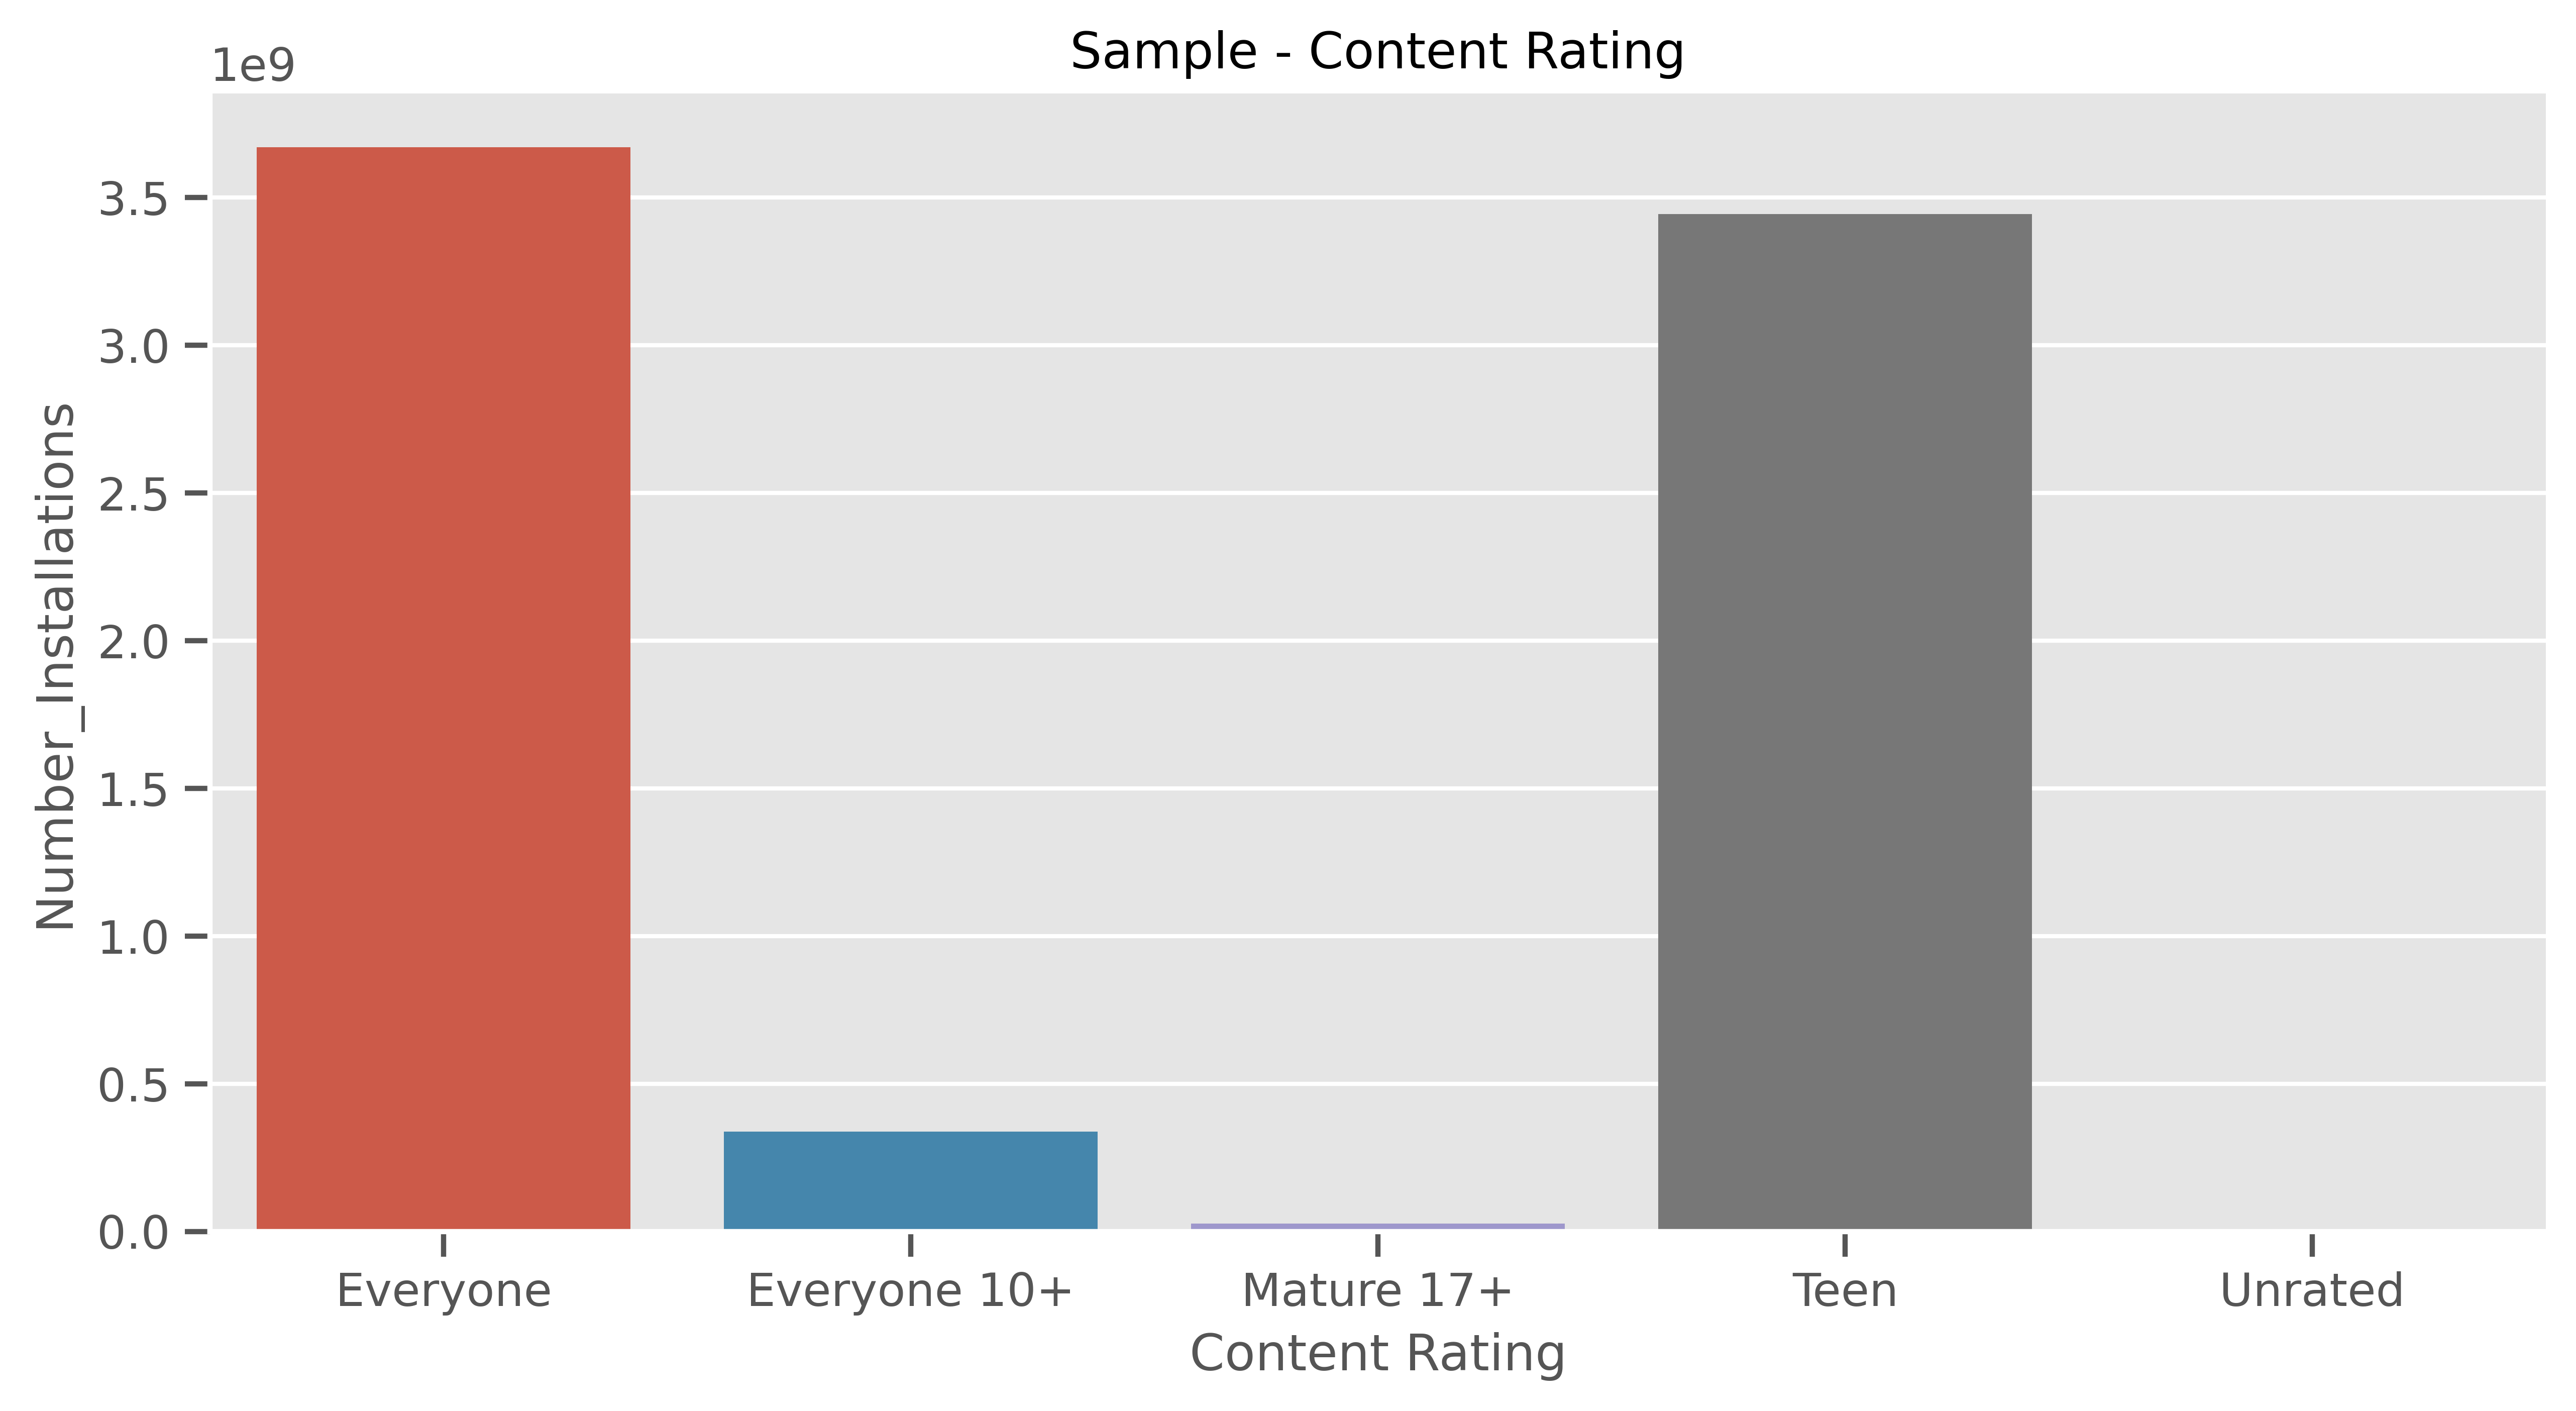

In [44]:
data_cont =  df.groupby('Content Rating')['Maximum Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.title("Sample - Content Rating")
plt.show()

Text(0.5, 1.0, 'Sample - Rating VS Content Rating')

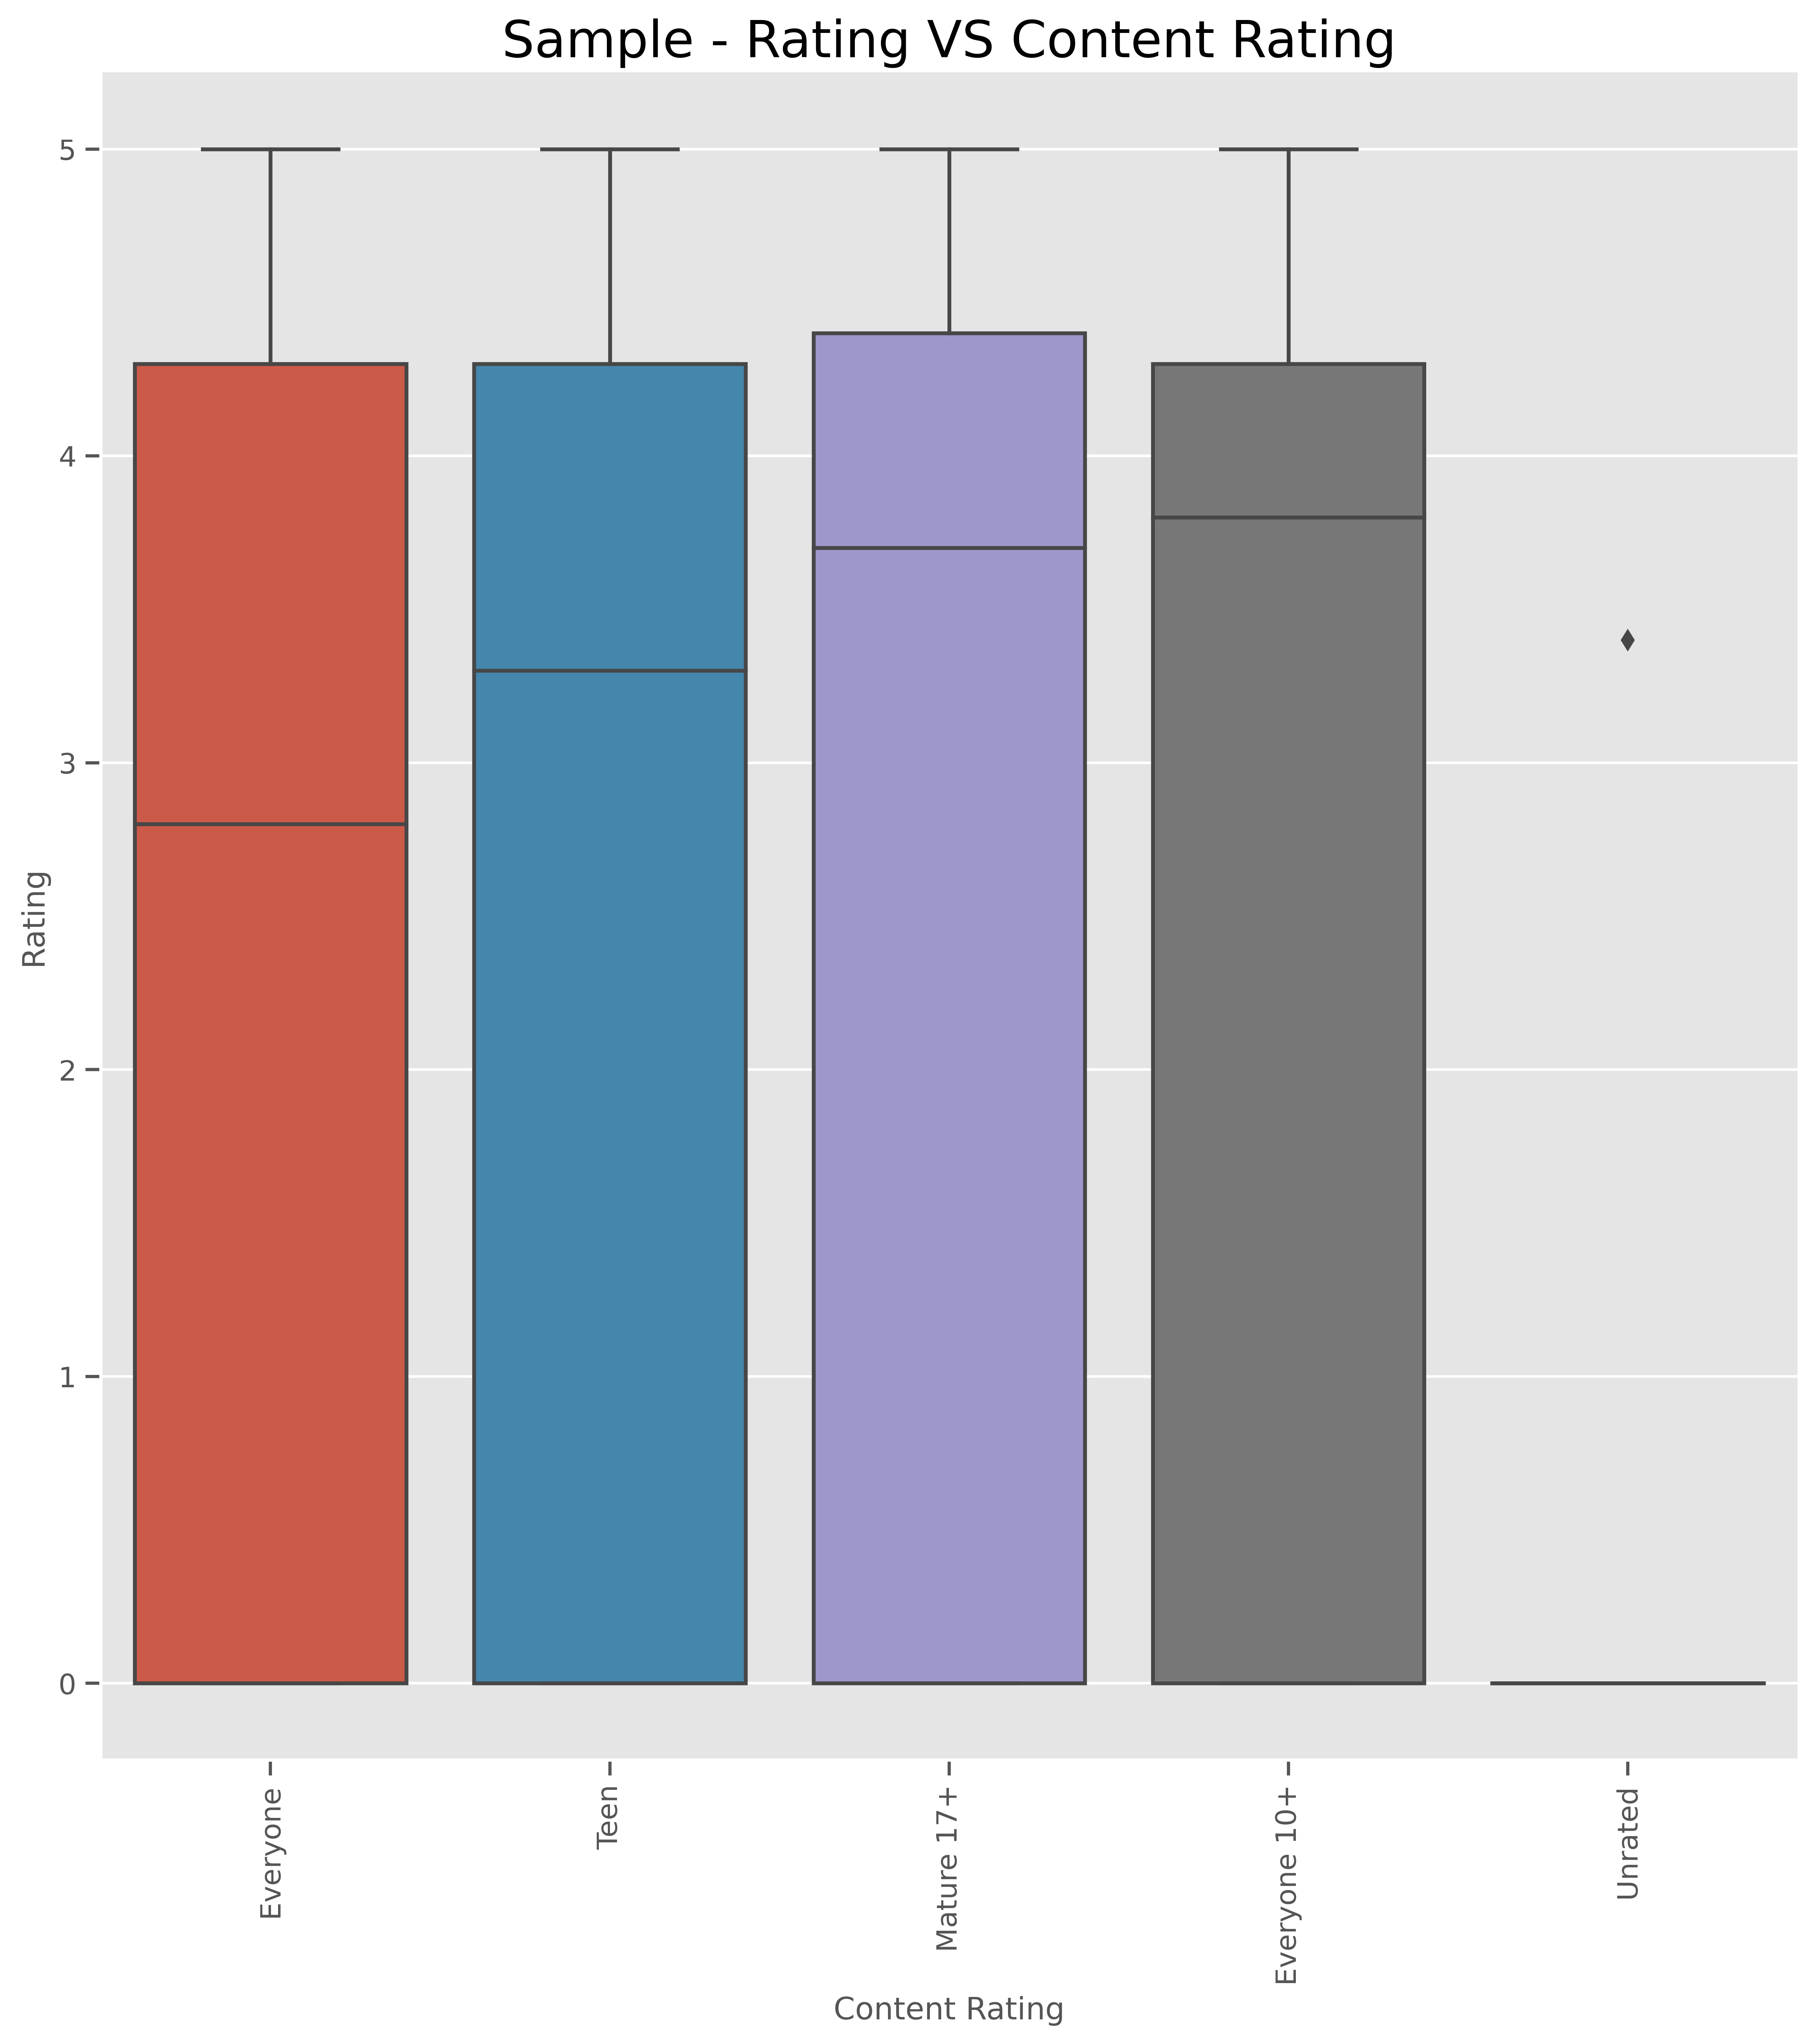

In [45]:
_ = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title('Sample - Rating VS Content Rating',size = 20)

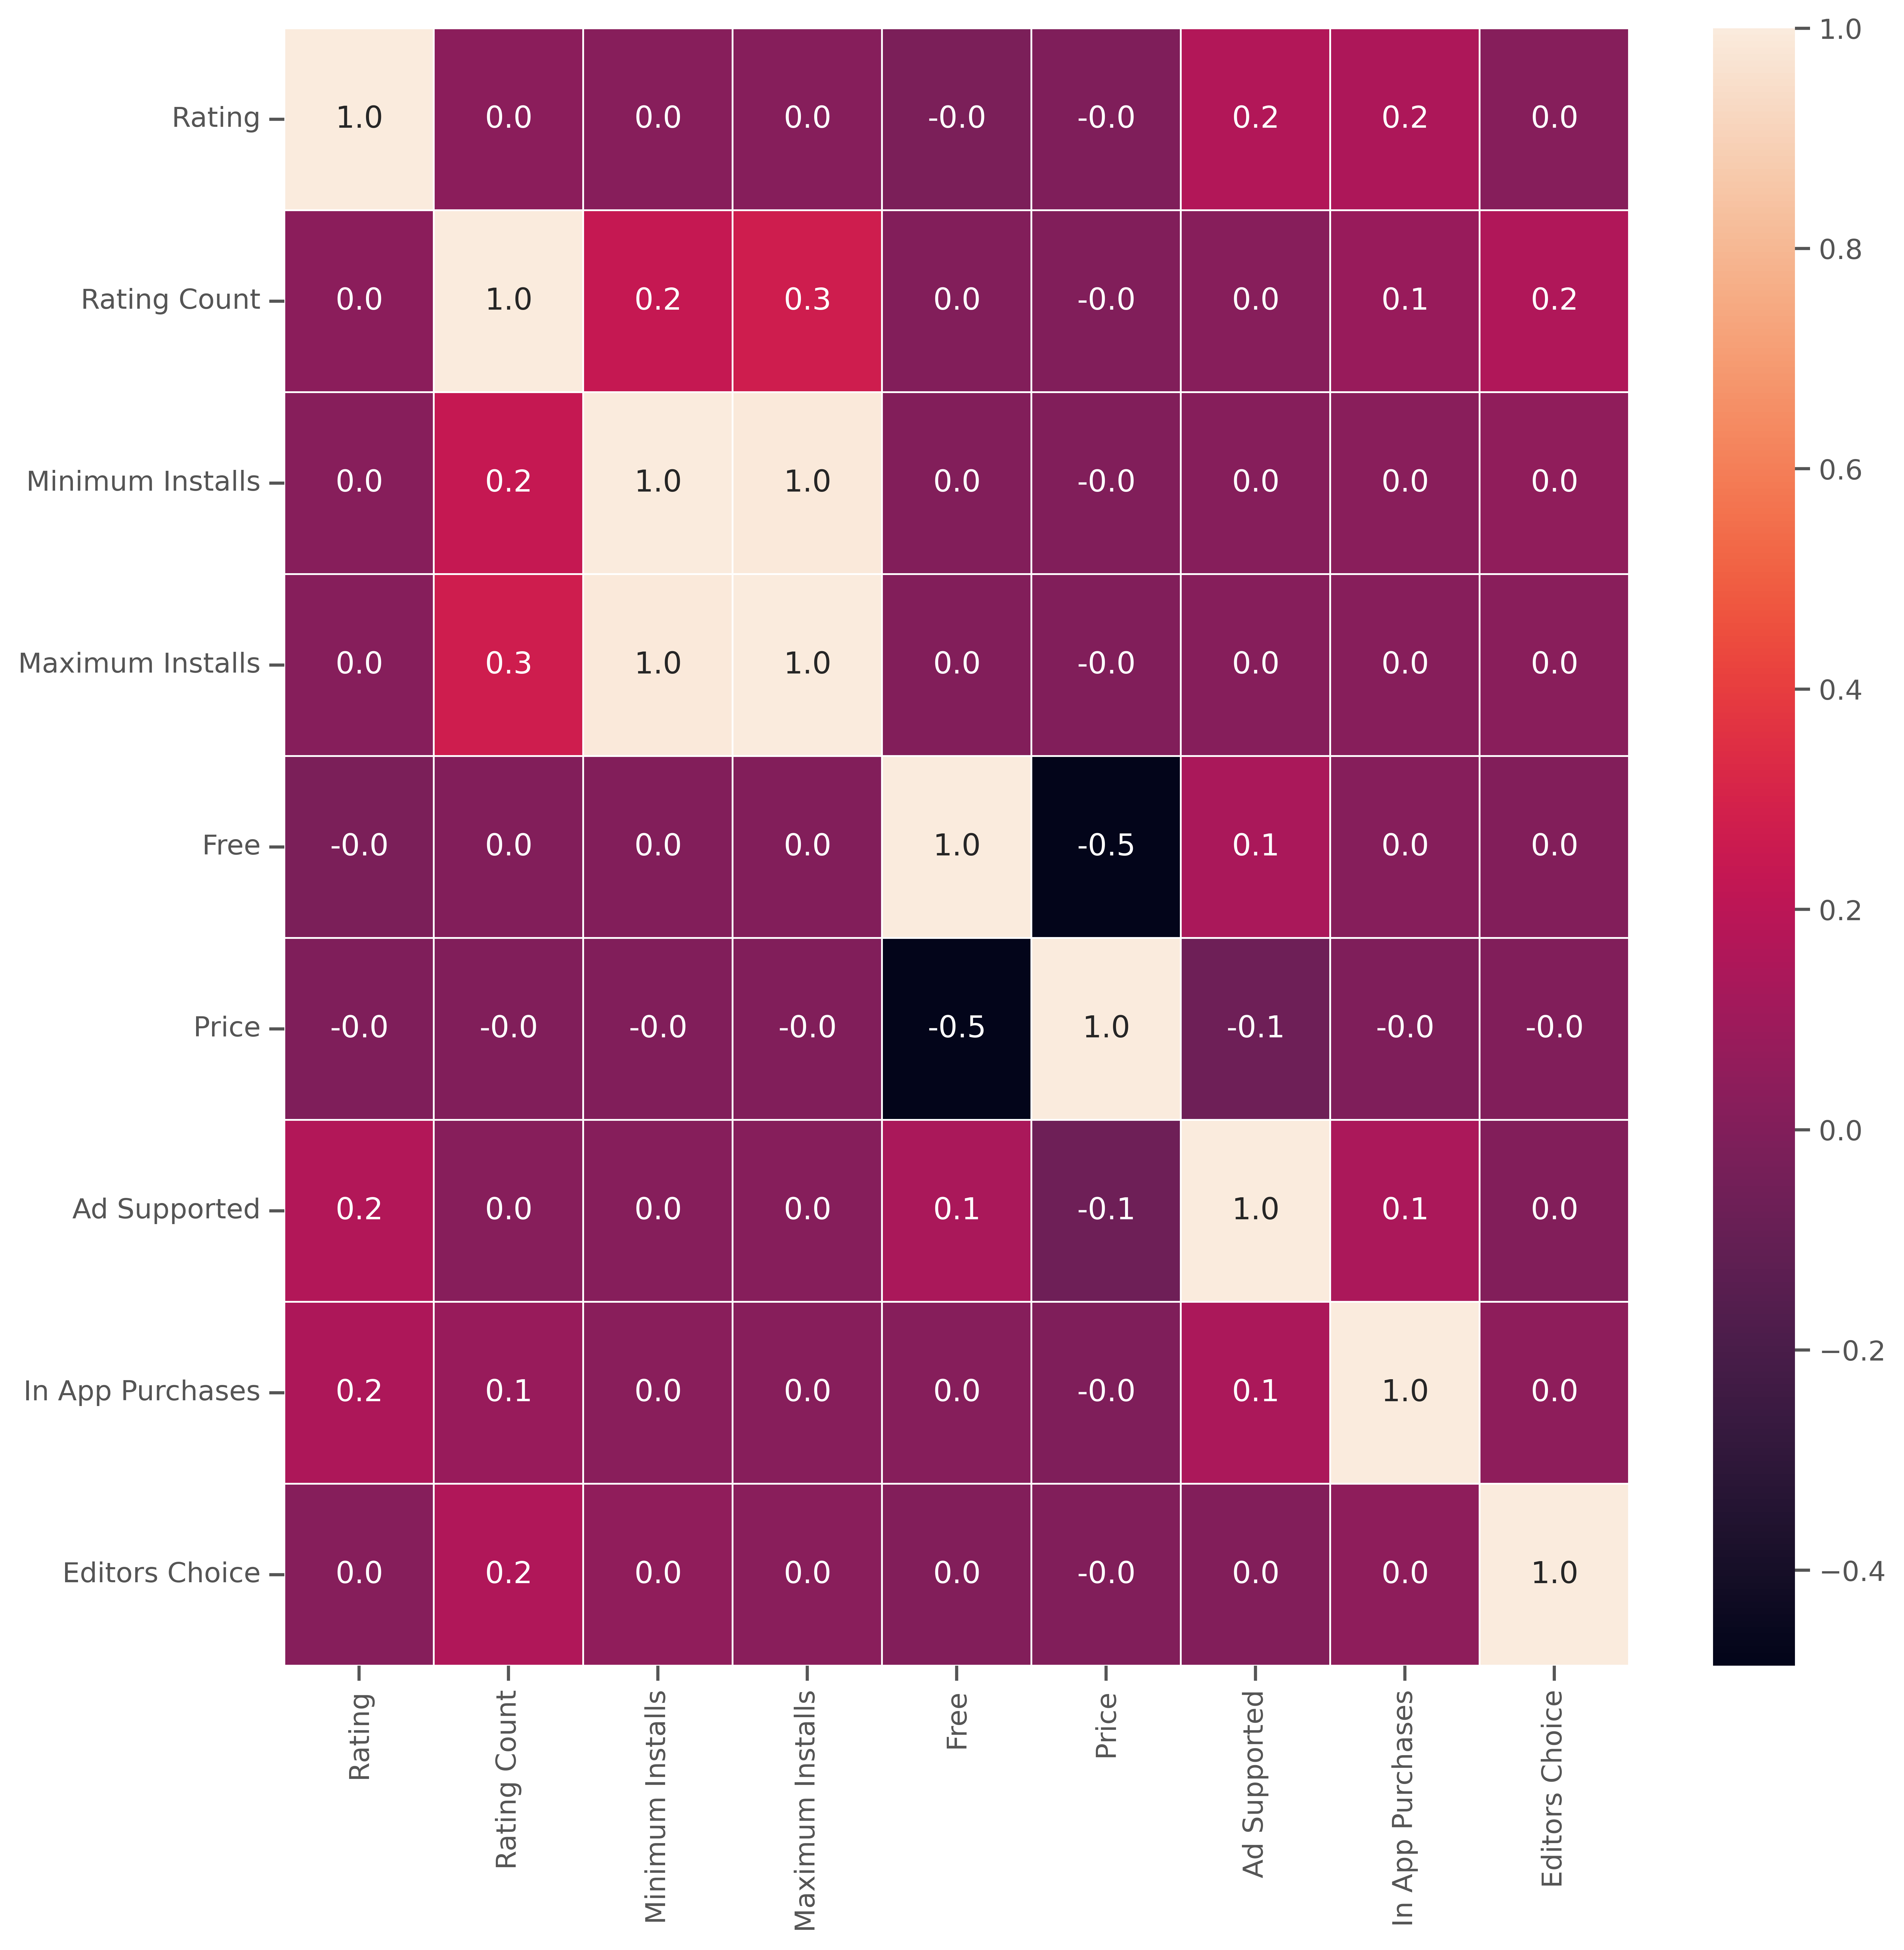

In [46]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [52]:
df.to_csv('Google-Playstore(new).csv')
